# problem statement 

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


# importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore


# loading the dataset

In [5]:
df=pd.read_csv("cr_dataset.csv")

In [6]:
df.head(10)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   
5                Female         31-40 years   
6                  Male         41-50 yaers   
7                  Male         41-50 yaers   
8                Female  Less than 20 years   
9                Female         31-40 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
5                                 Noida   
6                                 Delhi   
7                                 Delhi   
8                                 Solan   
9                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       
5                                             201308       
6                                             110011       
7                                             110018       
8                                             173229       
9                                             110039       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   
5                              Above 4 years   
6                              Above 4 years   
7                                  3-4 years   
8                                  2-3 years   
9                           Less than 1 year   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      
5                                 41 times and above                      
6                                        31-40 times                      
7                                 Less than 10 times                      
8                                 Less than 10 times                      
9                                 Less than 10 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         
5                                              Wi-Fi         
6                                              Wi-Fi         
7                                    Mobile Internet         
8                                              Wi-Fi         
9                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4

In [12]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [7]:
df.shape

(269, 71)

in this dataset, there are 269 rows and 71 columns. it suggests that the data has been collected from 269 respondants

In [10]:
df.isnull().sum().sum()

0

in the dataset there are no null values

In [13]:
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

it can be observed that all the columns have object type data

# checking the number of unique values in the columns

In [16]:
df.nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

# EDA

EDA will be performed to visualise the data using graphs and figures

In [21]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

we can see that in the dataset,the column names have unwanted tabs and spaces

In [28]:
# for removing the tab spaces
df.columns = df.columns.str.replace('\t','')

In [30]:
# for removal of the spaces before and after the questions
df.columns = df.columns.str.strip()

In [32]:
df.columns

Index(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

## visualisation

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

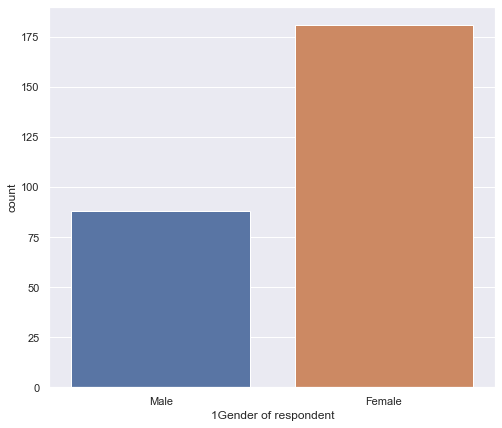

In [27]:
sns.set(rc={"figure.figsize":(8,7)})
sns.countplot(df['1Gender of respondent'])

maximum of the respondants who participated are female and the number of male respondants is close to half of the female ones

<AxesSubplot:xlabel='2 How old are you?', ylabel='count'>

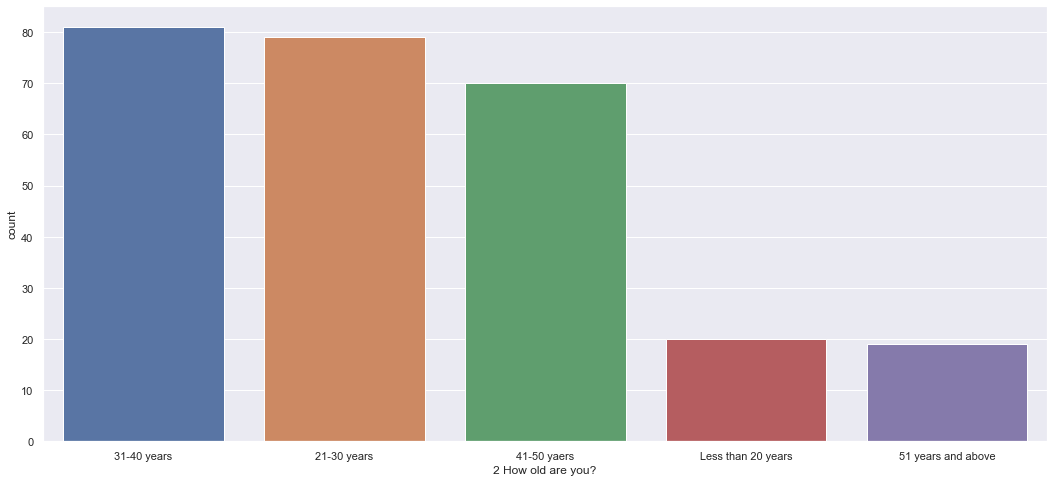

In [33]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['2 How old are you?'])

1.majority of the participants are in the age group of 31-40 years, and minimum participants are above age 51 years, who shop shop e-commerce.
2. people of age below 20years also shop less from e-commerce or online stores



<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

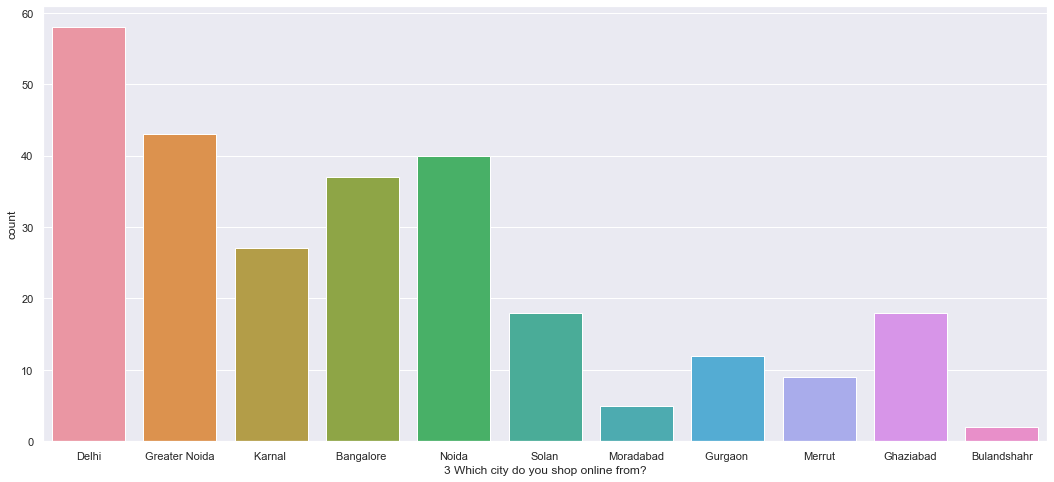

In [20]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['3 Which city do you shop online from?'])

maximum e-commerce shoppers are from Delhi and the minimum shoppers are from Bulandshahr,it can also be abbreviated that in the regions of Moradabad, Merut, Bulandshahr people are reluctant to use online stores



<AxesSubplot:ylabel='3 Which city do you shop online from?'>

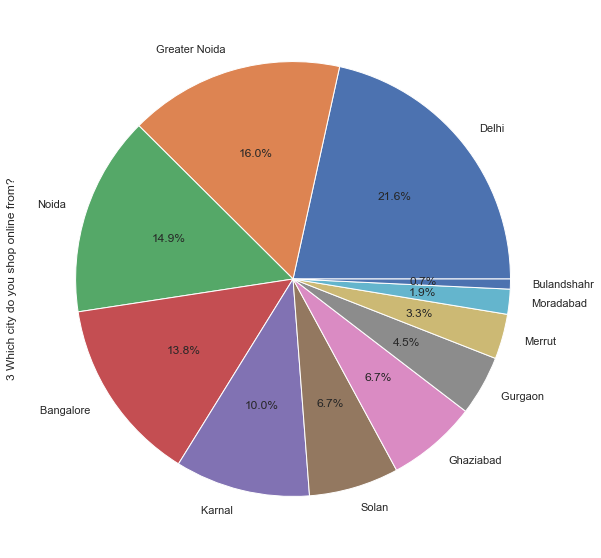

In [34]:
plt.figure(figsize=(10,10))
df['3 Which city do you shop online from?'].value_counts().plot.pie(autopct='%1.1f%%')

21.6% of online shoppers are from Delhi, 

after Delhi,maximum shoppers are from Noida, Greater Noida, Bangalore



<AxesSubplot:ylabel='4 What is the Pin Code of where you shop online from?'>

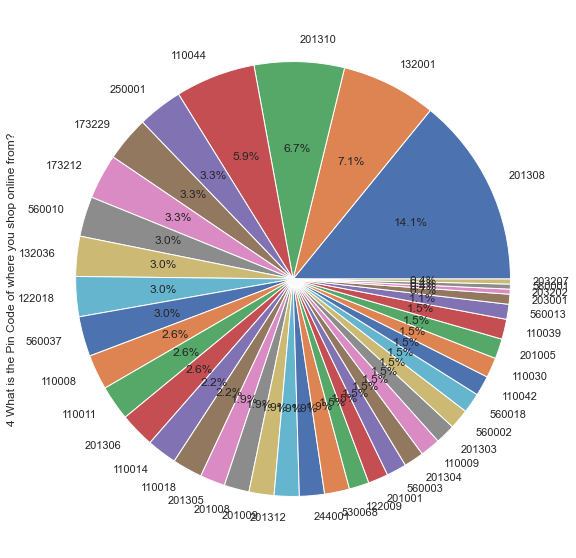

In [36]:
plt.figure(figsize=(10,10))
df['4 What is the Pin Code of where you shop online from?'].value_counts().plot.pie(autopct='%1.1f%%')

from the pie plot, we can observe that maximum online shoppers are from pincode 201308.

below the above pincode, majority shoppers are from 132001 and 201310.

the online retailers need to focus more on retention of the customers residing in these pincode

<AxesSubplot:ylabel='5 Since How Long You are Shopping Online ?'>

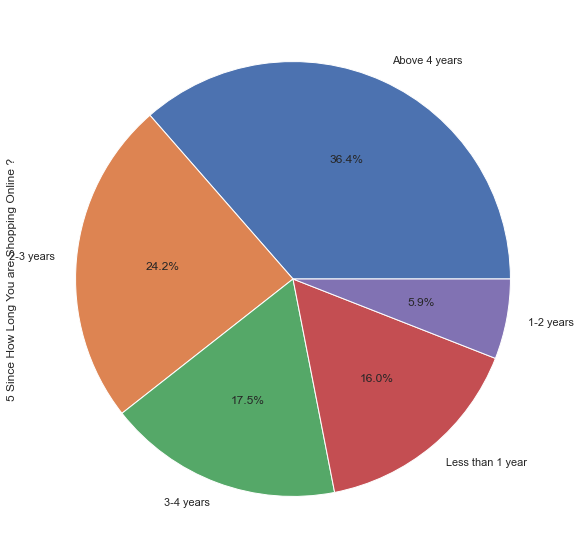

In [37]:
plt.figure(figsize=(10,10))
df['5 Since How Long You are Shopping Online ?'].value_counts().plot.pie(autopct='%1.1f%%')

observation: more than 36.4% of the respondants are shopping online for more than 4 years, 

24.2% of them for 2 to 3 years, 

17.5 % for 3-4years, 

5.9% for 1 to 2 years 

16% of them for less than 1 year

<AxesSubplot:ylabel='6 How many times you have made an online purchase in the past 1 year?'>

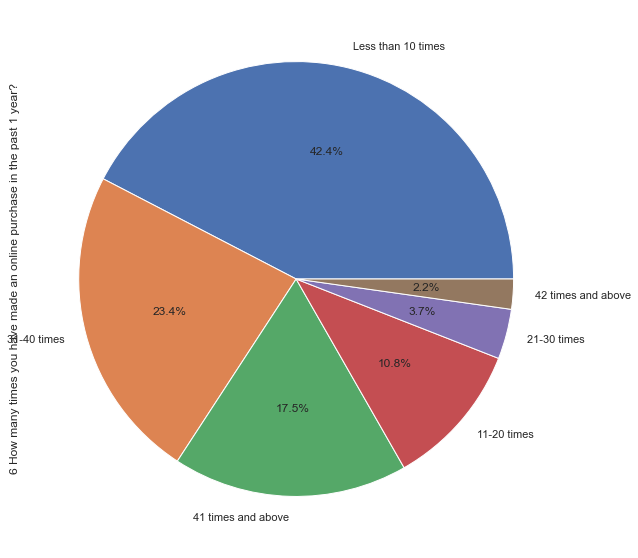

In [38]:
plt.figure(figsize=(10,10))
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts().plot.pie(autopct='%1.1f%%')

maximum of the respondants (42.4%) shop online for less than 10 times in a year

a small portion of respondants of nearly 2.2% shop online for more than 42 times



<AxesSubplot:ylabel='7 How do you access the internet while shopping on-line?'>

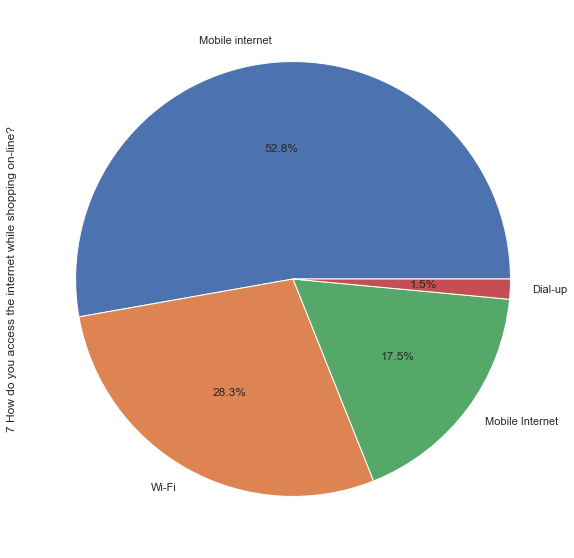

In [39]:
plt.figure(figsize=(10,10))
df['7 How do you access the internet while shopping on-line?'].value_counts().plot.pie(autopct='%1.1f%%')

52.8% of the online shoppers use mobile data for online shopping

28.3 % uses wifi connection



<AxesSubplot:ylabel='8 Which device do you use to access the online shopping?'>

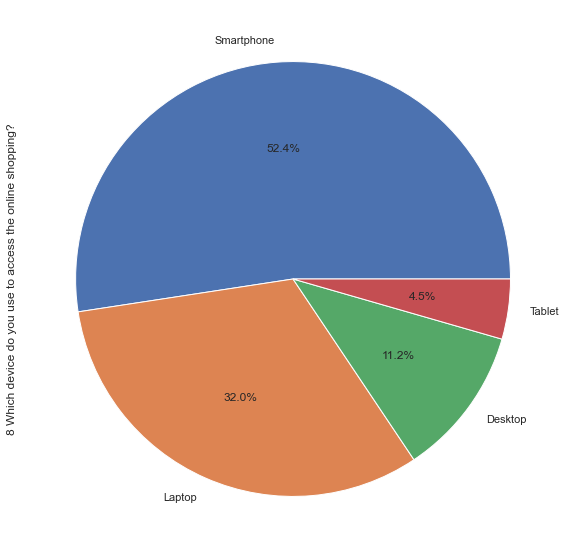

In [40]:
plt.figure(figsize=(10,10))
df['8 Which device do you use to access the online shopping?'].value_counts().plot.pie(autopct='%1.1f%%')

majority of the shoppers uses mobilephone (52.4%) for online shopping
32% uses laptop, 11.2 % uses desktop and 4.5% uses tablet

the companies need to focus on improvement and further development of their mobile applications

<AxesSubplot:ylabel='9 What is the screen size of your mobile device?'>

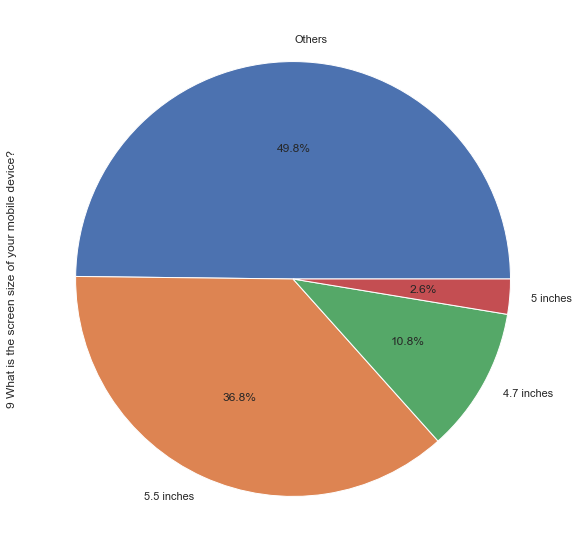

In [41]:
plt.figure(figsize=(10,10))
df['9 What is the screen size of your mobile device?'].value_counts().plot.pie(autopct='%1.1f%%')

36.8% of the respondants uses mobiles of screen size 5.5 inches, 

10.8% of the respondants uses mobiles of screen size 4.7 inches, 

2.6% of the respondants uses mobiles of screen size 5 inches, 


however,majority uses mobile devices of other display size, it can be abbreviated that the users uses devices of screen size greater than 5.5 inches because in the market majority of smartphones have size greater than 5.5 inches 

<AxesSubplot:ylabel='10 What is the operating system (OS) of your device?'>

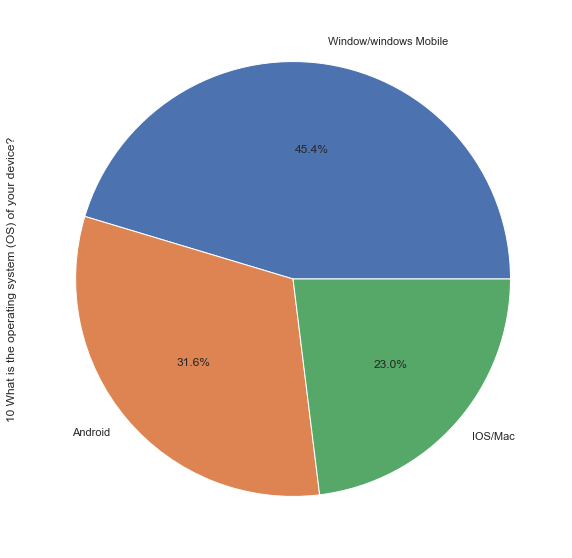

In [42]:
plt.figure(figsize=(10,10))
df['10 What is the operating system (OS) of your device?'].value_counts().plot.pie(autopct='%1.1f%%')

majority of the users uses window os (45.4%)

while android using online shoppers are 31.6%

and ios using shoppers are 23%


<AxesSubplot:ylabel='11 What browser do you run on your device to access the website?'>

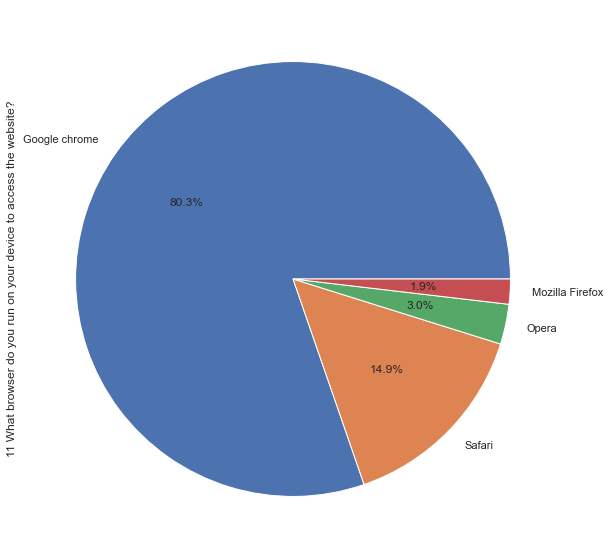

In [43]:
plt.figure(figsize=(10,10))
df['11 What browser do you run on your device to access the website?'].value_counts().plot.pie(autopct='%1.1f%%')

more than 80% of users use Google Chrome for accessing the website for online shopping

<AxesSubplot:ylabel='12 Which channel did you follow to arrive at your favorite online store for the first time?'>

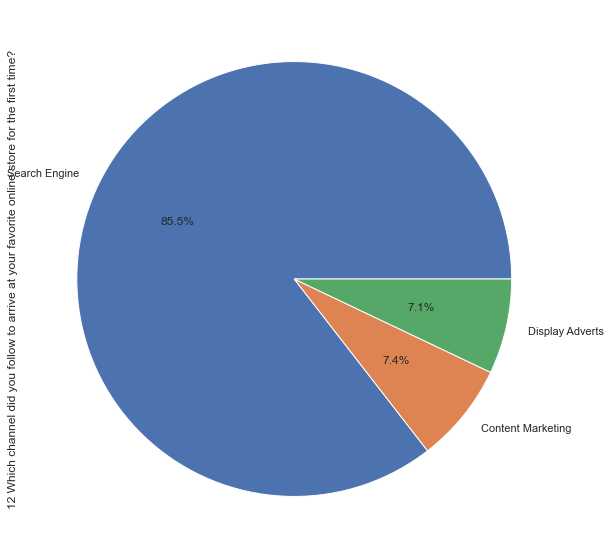

In [44]:
plt.figure(figsize=(10,10))
df['12 Which channel did you follow to arrive at your favorite online store for the first time?'].value_counts().plot.pie(autopct='%1.1f%%')

majority of the respondants (85.5%) uses search engine to arrive at their favorite online store for the first time

<AxesSubplot:ylabel='13 After first visit, how do you reach the online retail store?'>

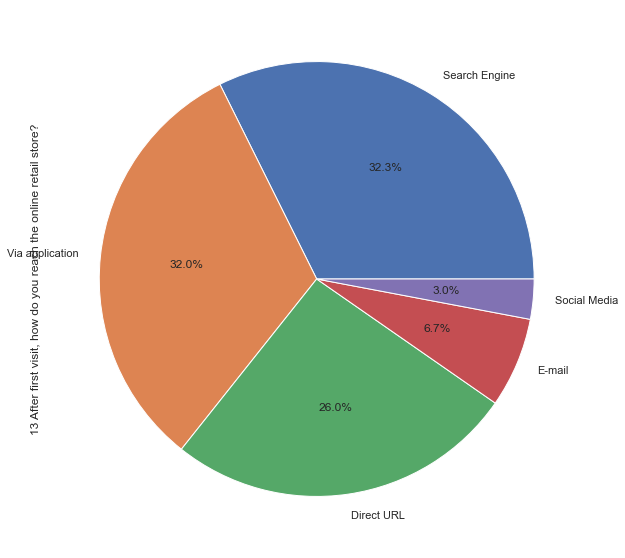

In [45]:
plt.figure(figsize=(10,10))
df['13 After first visit, how do you reach the online retail store?'].value_counts().plot.pie(autopct='%1.1f%%')

respondants nearly prefer both application and search engine for reaching the online retal store after first visit.

other channels used by them are direct url, email and social media

<AxesSubplot:ylabel='14 How much time do you explore the e- retail store before making a purchase decision?'>

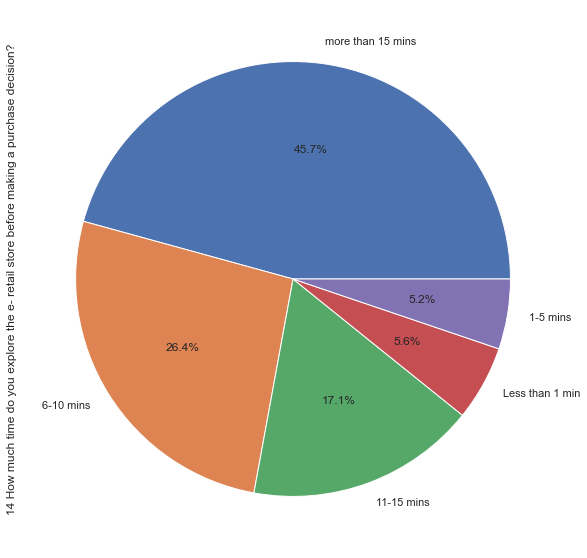

In [46]:
plt.figure(figsize=(10,10))
df['14 How much time do you explore the e- retail store before making a purchase decision?'].value_counts().plot.pie(autopct='%1.1f%%')

majority of the online shoppers explore the e-retail store for making their purchase decision, this means that they focus on product research and product comparison.

<AxesSubplot:ylabel='15 What is your preferred payment Option?'>

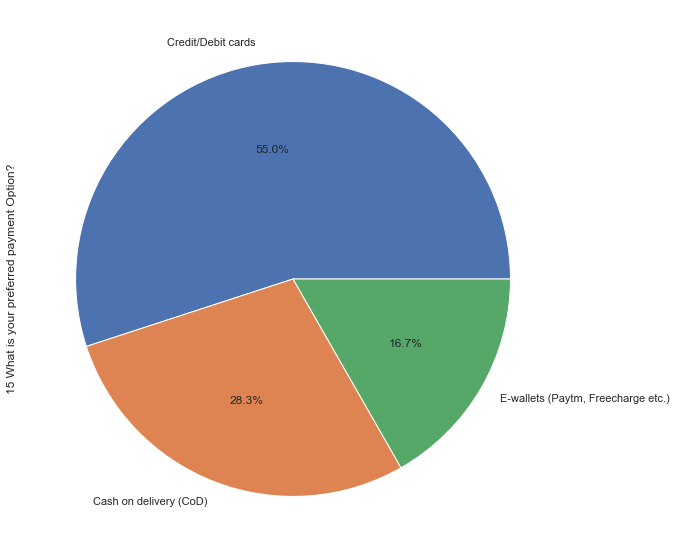

In [47]:
plt.figure(figsize=(10,10))
df['15 What is your preferred payment Option?'].value_counts().plot.pie(autopct='%1.1f%%')

the most preferred payment option of the online shoppers is cerdit and debit cards. this suggets that the e-retail stores have established trust among the customers

<AxesSubplot:ylabel='16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'>

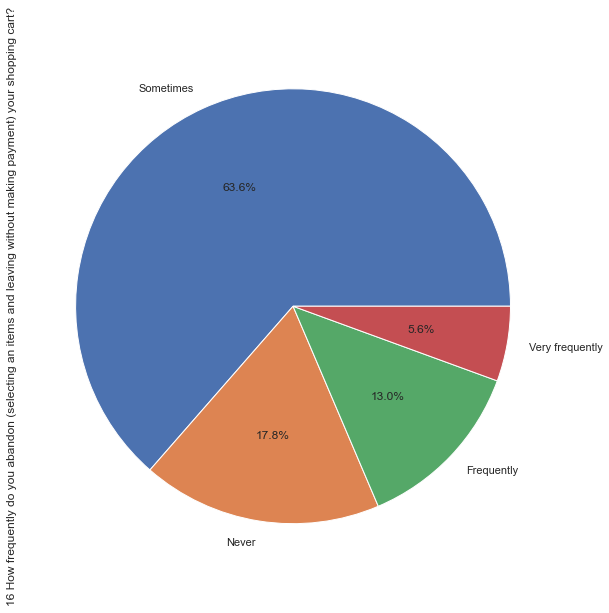

In [48]:
plt.figure(figsize=(10,10))
df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'].value_counts().plot.pie(autopct='%1.1f%%')

very few customers selects an item and nevers proceeds for payment

17.8% of the respondants always purchases as they adds product to cart

13% of respondants frequently leaves without purchasing

<AxesSubplot:ylabel='17 Why did you abandon the ?Bag?, ?Shopping Cart??'>

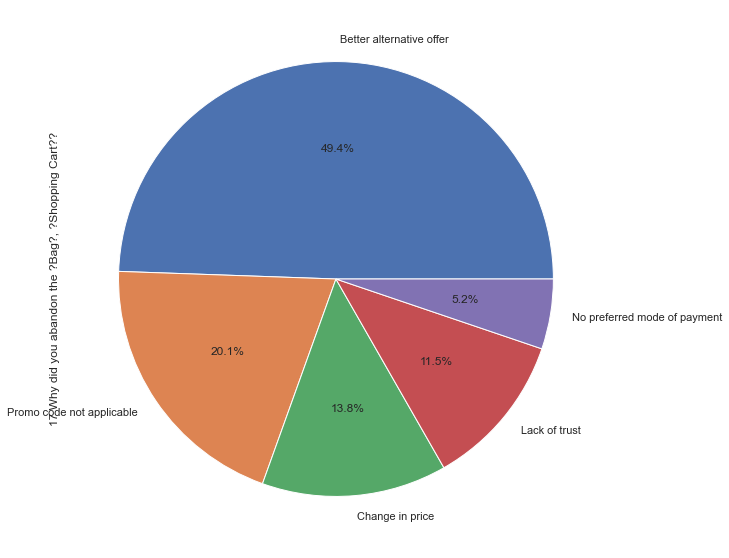

In [49]:
plt.figure(figsize=(10,10))
df['17 Why did you abandon the ?Bag?, ?Shopping Cart??'].value_counts().plot.pie(autopct='%1.1f%%')

majority of the customers (49.4%) abandons the cart because of better alternative offers


<AxesSubplot:ylabel='18 The content on the website must be easy to read and understand'>

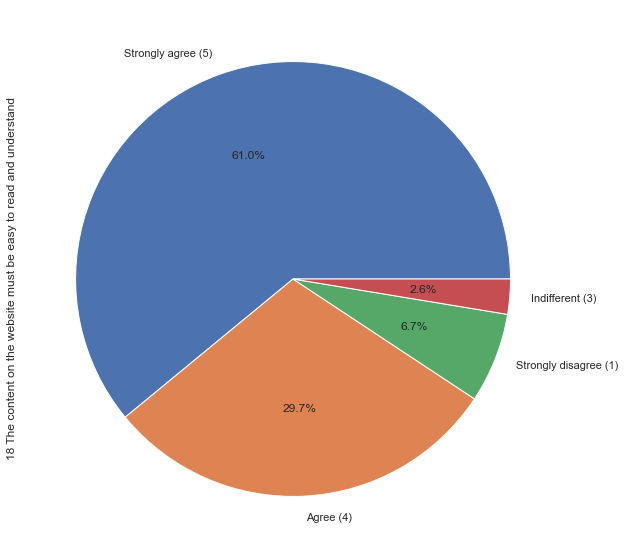

In [50]:
plt.figure(figsize=(10,10))
df['18 The content on the website must be easy to read and understand'].value_counts().plot.pie(autopct='%1.1f%%')

61% of the respondants strongly agree that the content must be easy for better understanding
this means the online retailers need to focus on improvement of the interface to make it simple and clear for the users

<AxesSubplot:ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

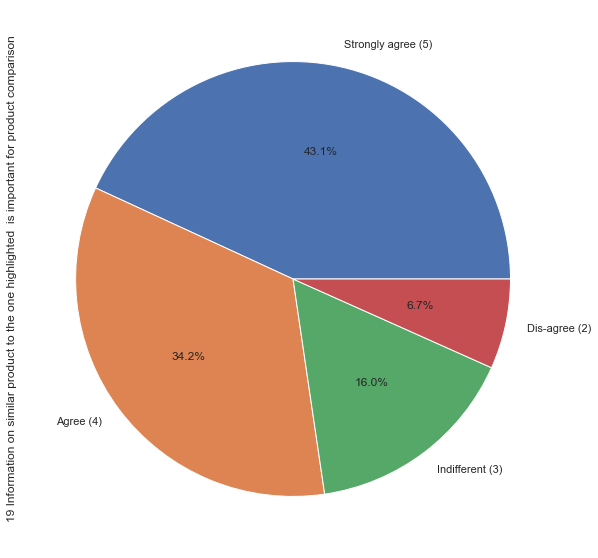

In [51]:
plt.figure(figsize=(10,10))
df['19 Information on similar product to the one highlighted  is important for product comparison'].value_counts().plot.pie(autopct='%1.1f%%')

nearly 43.1% and 34.2% agrees that Information on similar product to the one highlighted  is important for product comparison

<AxesSubplot:ylabel='20 Complete information on listed seller and product being offered is important for purchase decision.'>

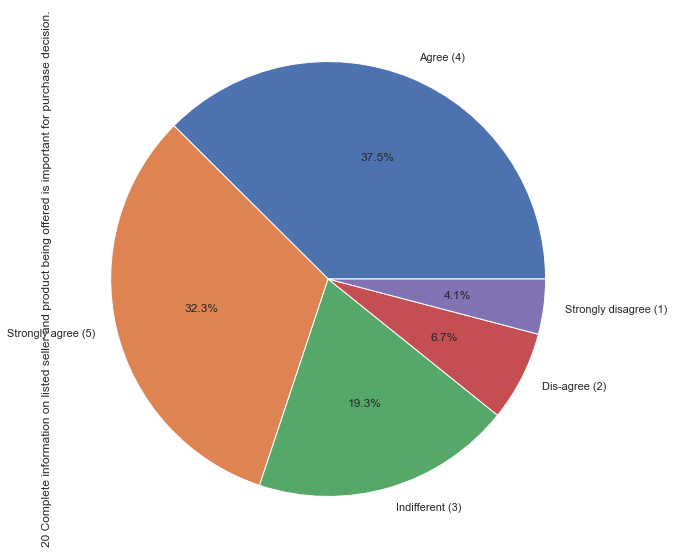

In [52]:
plt.figure(figsize=(10,10))
df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts().plot.pie(autopct='%1.1f%%')

majority agrees that information of the seller and the product is important for making purchase decsision

<AxesSubplot:ylabel='21 All relevant information on listed products must be stated clearly'>

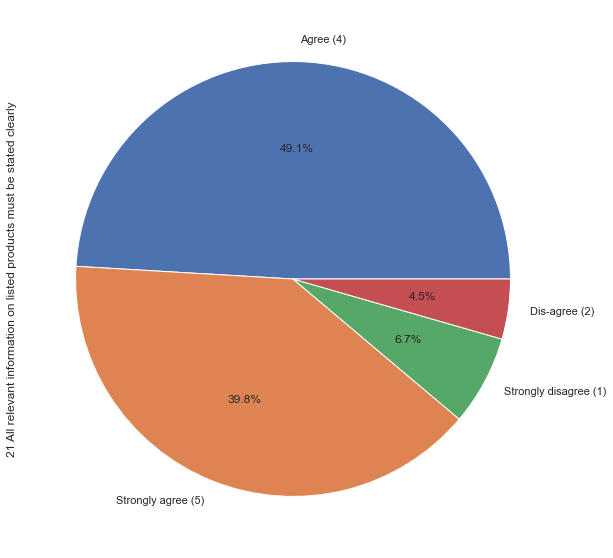

In [67]:
plt.figure(figsize=(10,10))
df['21 All relevant information on listed products must be stated clearly'].value_counts().plot.pie(autopct='%1.1f%%')

49.1% of the online shoppers agrees with this statement

<AxesSubplot:ylabel='22 Ease of navigation in website'>

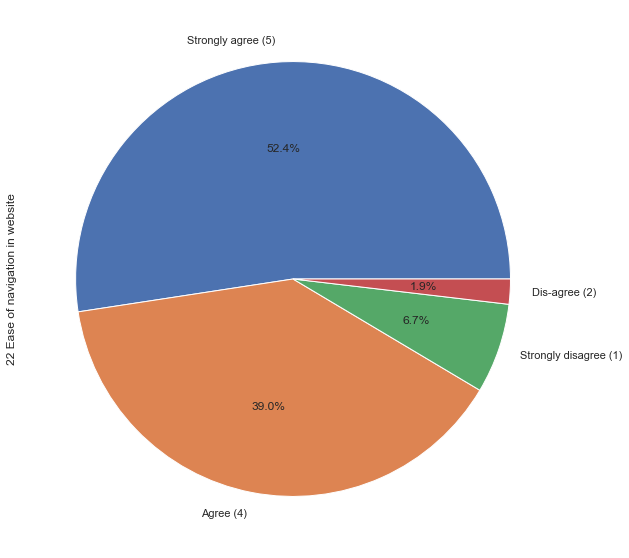

In [68]:
plt.figure(figsize=(10,10))
df['22 Ease of navigation in website'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='23 Loading and processing speed'>

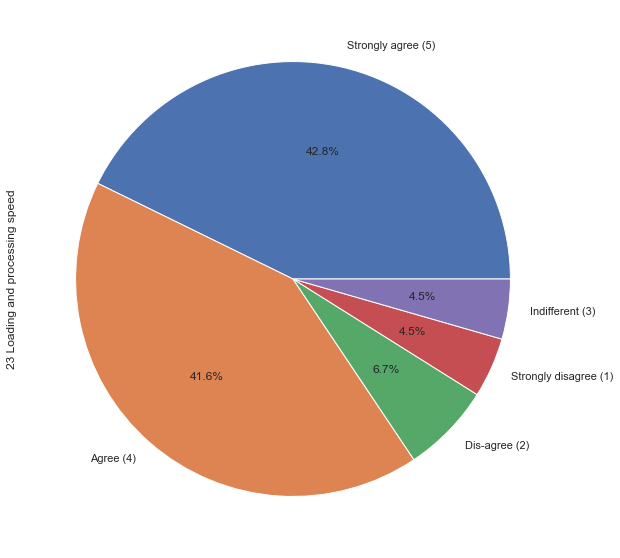

In [69]:
plt.figure(figsize=(10,10))
df['23 Loading and processing speed'].value_counts().plot.pie(autopct='%1.1f%%')

loading and processing speed is important is agreed and strongly agreed by 42.8% and 41.6% respectively.

<AxesSubplot:ylabel='24 User friendly Interface of the website'>

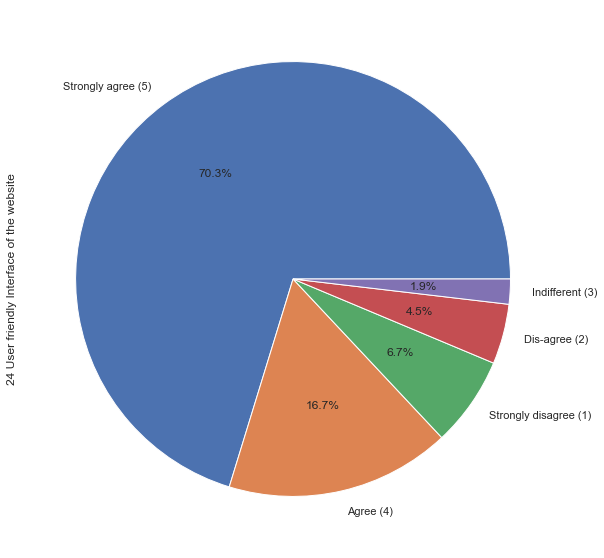

In [75]:
plt.figure(figsize=(10,10))
df['24 User friendly Interface of the website'].value_counts().plot.pie(autopct='%1.1f%%')

70.3% or majority of the responants strongly agrees that user friendliness of the website is important 

<AxesSubplot:ylabel='25 Convenient Payment methods'>

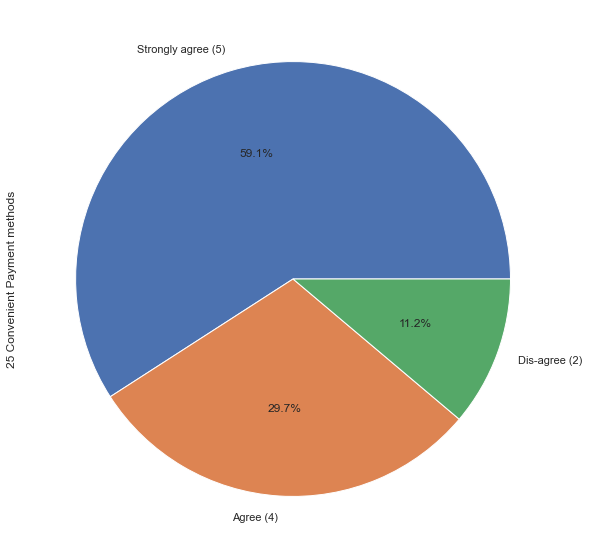

In [76]:
plt.figure(figsize=(10,10))
df['25 Convenient Payment methods'].value_counts().plot.pie(autopct='%1.1f%%')

majority of the respondants (59.1%) stronly agrees with convenient payment methods

<AxesSubplot:ylabel='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'>

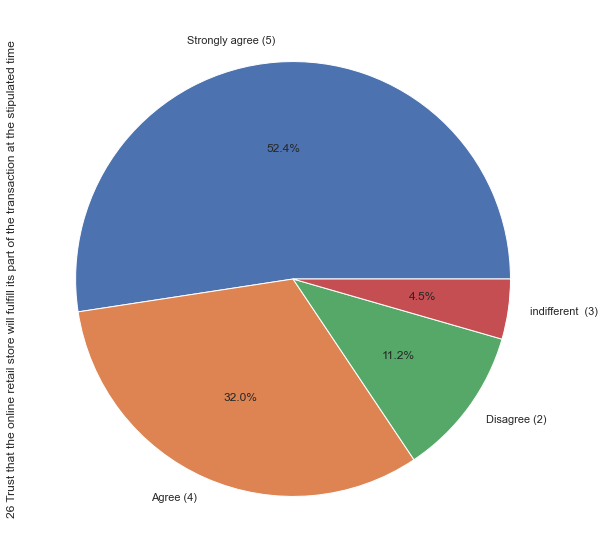

In [77]:
plt.figure(figsize=(10,10))
df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts().plot.pie(autopct='%1.1f%%')

52.4 % of the respondants strongly agrees that online retail store will fulfill its part of the transaction at the stipulated time, this suggests that they have faith on the online stores

<AxesSubplot:ylabel='27 Empathy (readiness to assist with queries) towards the customers'>

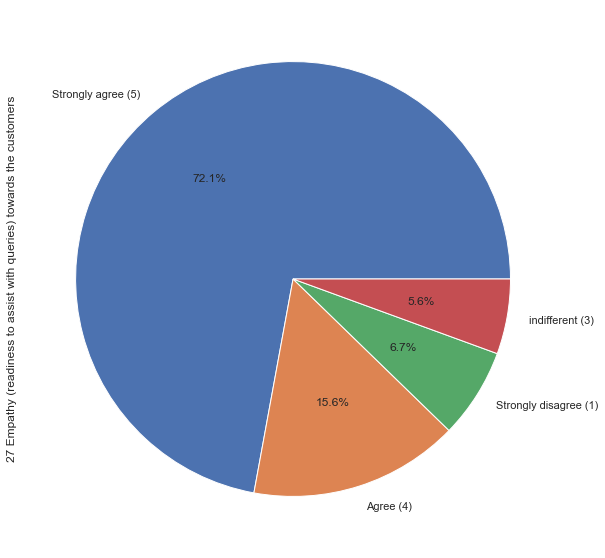

In [78]:
plt.figure(figsize=(10,10))
df['27 Empathy (readiness to assist with queries) towards the customers'].value_counts().plot.pie(autopct='%1.1f%%')

close to 72.1% believes that the online stores have strong empathy towards the customer

<AxesSubplot:ylabel='28 Being able to guarantee the privacy of the customer'>

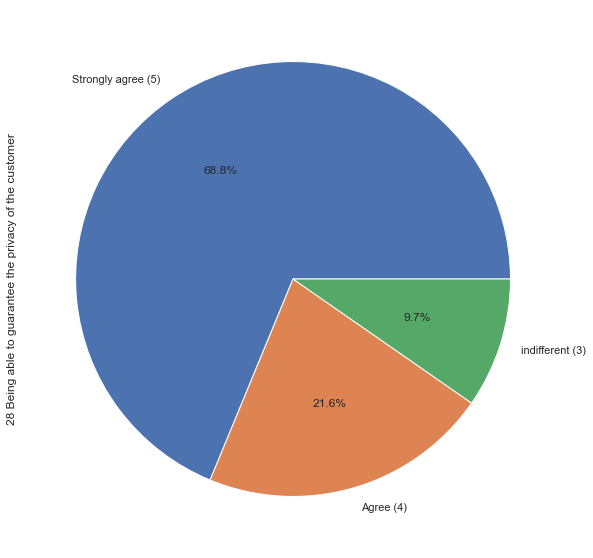

In [79]:
plt.figure(figsize=(10,10))
df['28 Being able to guarantee the privacy of the customer'].value_counts().plot.pie(autopct='%1.1f%%')

more than 68.4 % of respondants have faith on ecommerce stores in the aspect of privacy 

<AxesSubplot:ylabel='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'>

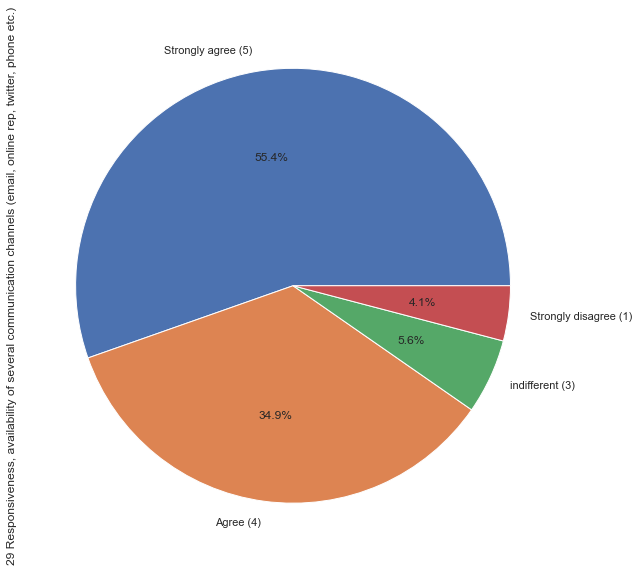

In [80]:
plt.figure(figsize=(10,10))
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts().plot.pie(autopct='%1.1f%%')

majority strongly agrees that several communication channels are avaialable for response

<AxesSubplot:ylabel='30 Online shopping gives monetary benefit and discounts'>

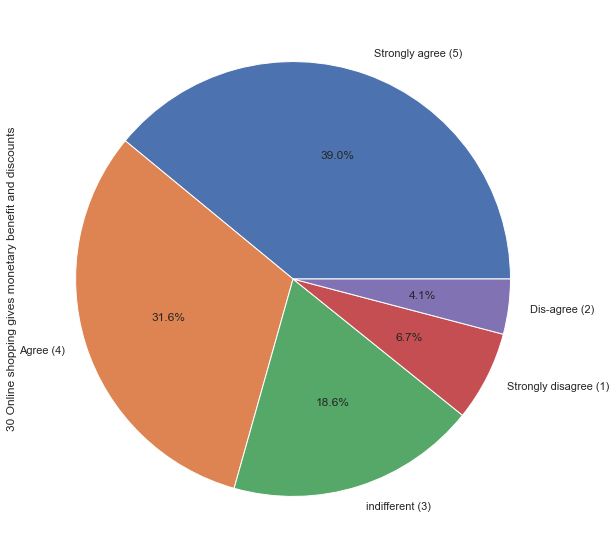

In [81]:
plt.figure(figsize=(10,10))
df['30 Online shopping gives monetary benefit and discounts'].value_counts().plot.pie(autopct='%1.1f%%')

39.1% stronglyagrees that they get monetary benefits from online shopping and 31.6% agrees

<AxesSubplot:ylabel='31 Enjoyment is derived from shopping online'>

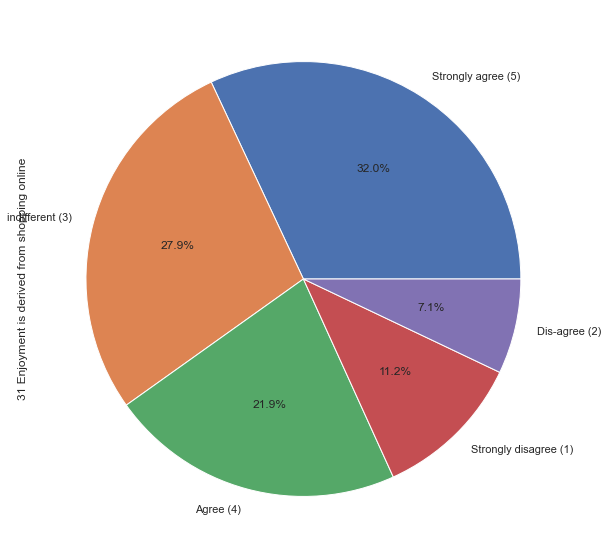

In [82]:
plt.figure(figsize=(10,10))
df['31 Enjoyment is derived from shopping online'].value_counts().plot.pie(autopct='%1.1f%%')

majority strongly agrees that they enjoy shopping online

<AxesSubplot:ylabel='32 Shopping online is convenient and flexible'>

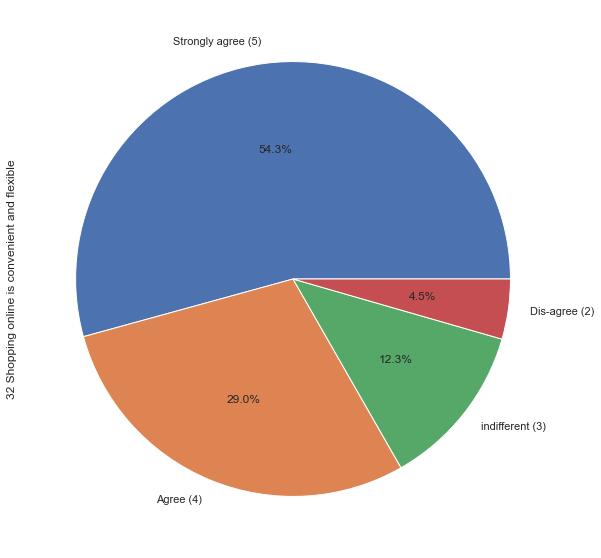

In [83]:
plt.figure(figsize=(10,10))
df['32 Shopping online is convenient and flexible'].value_counts().plot.pie(autopct='%1.1f%%')

majority strongly agrees that online shopping is flexible and conveneint

<AxesSubplot:ylabel='33 Return and replacement policy of the e-tailer is important for purchase decision'>

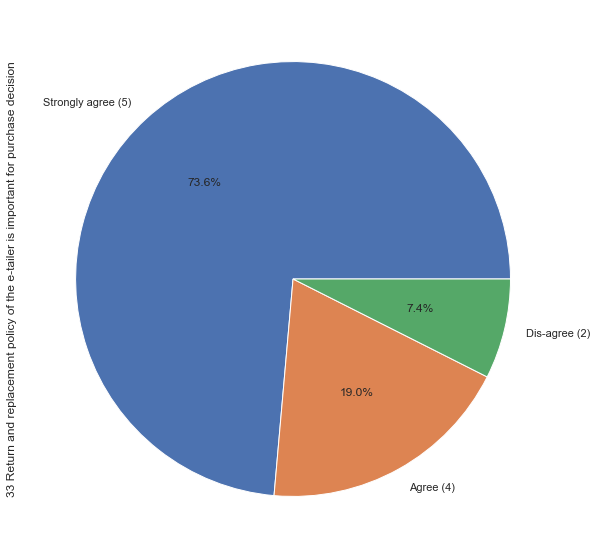

In [84]:
plt.figure(figsize=(10,10))
df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts().plot.pie(autopct='%1.1f%%')

it suggests that the the return policy of the eretailer infleunces customer satisfaction and engagement

<AxesSubplot:ylabel='34 Gaining access to loyalty programs is a benefit of shopping online'>

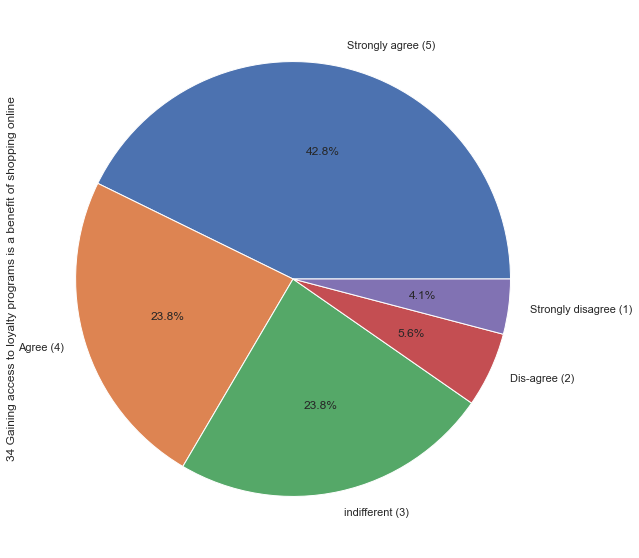

In [85]:
plt.figure(figsize=(10,10))
df['34 Gaining access to loyalty programs is a benefit of shopping online'].value_counts().plot.pie(autopct='%1.1f%%')

majority agrees strongly that loyalty programs is a benefit

<AxesSubplot:ylabel='35 Displaying quality Information on the website improves satisfaction of customers'>

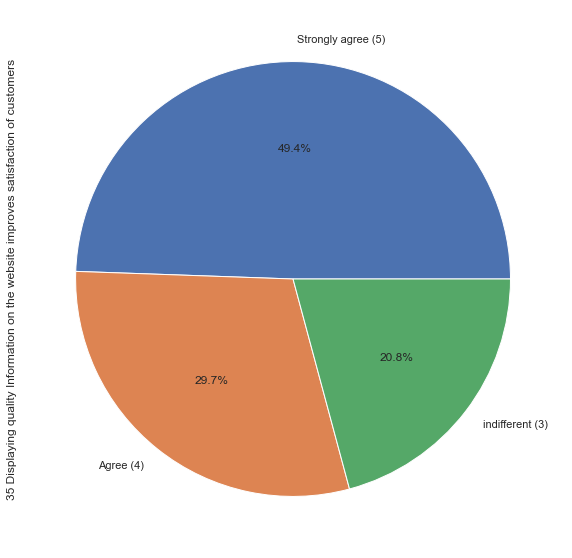

In [87]:
plt.figure(figsize=(10,10))
df['35 Displaying quality Information on the website improves satisfaction of customers'].value_counts().plot.pie(autopct='%1.1f%%')

majority strongly agrees that display of quality information improves their satisfaction

<AxesSubplot:ylabel='36 User derive satisfaction while shopping on a good quality website or application'>

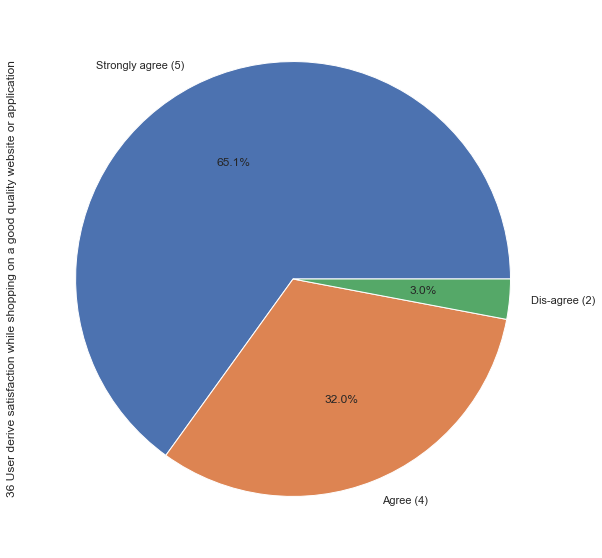

In [88]:
plt.figure(figsize=(10,10))
df['36 User derive satisfaction while shopping on a good quality website or application'].value_counts().plot.pie(autopct='%1.1f%%')

majority strongly agrees that are more satisfied when they shop from good quality stores

<AxesSubplot:ylabel='37 Net Benefit derived from shopping online can lead to users satisfaction'>

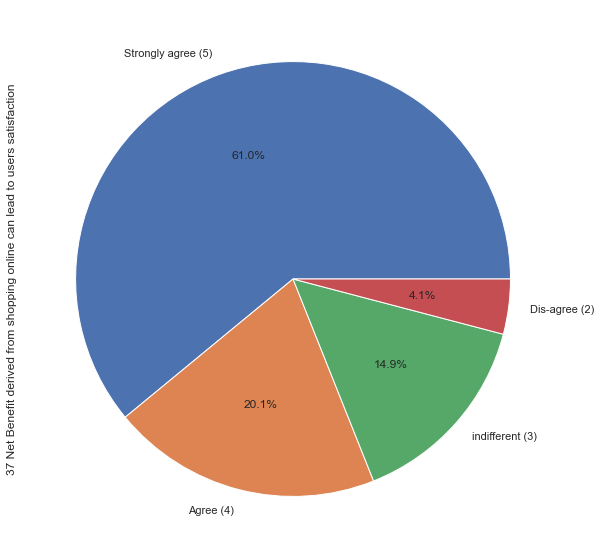

In [89]:
plt.figure(figsize=(10,10))
df['37 Net Benefit derived from shopping online can lead to users satisfaction'].value_counts().plot.pie(autopct='%1.1f%%')

majority strongly agrees that net benefit leads to the satisfaction

<AxesSubplot:ylabel='38 User satisfaction cannot exist without trust'>

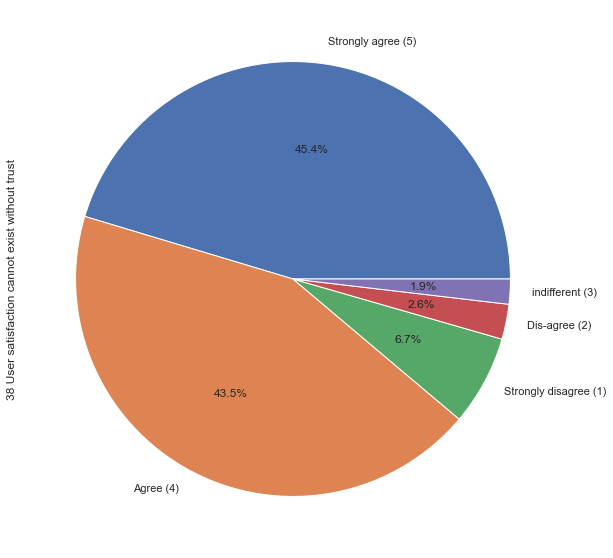

In [90]:
plt.figure(figsize=(10,10))
df['38 User satisfaction cannot exist without trust'].value_counts().plot.pie(autopct='%1.1f%%')

equal respondants astrong agrees and agrees that trust is important for their satisfaction

<AxesSubplot:ylabel='39 Offering a wide variety of listed product in several category'>

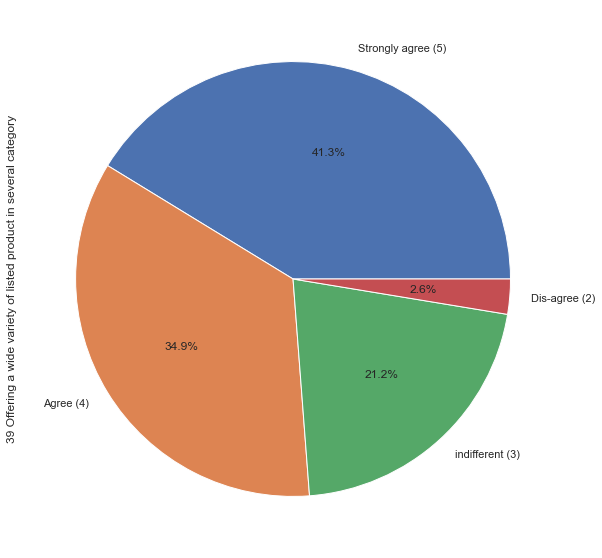

In [91]:
plt.figure(figsize=(10,10))
df['39 Offering a wide variety of listed product in several category'].value_counts().plot.pie(autopct='%1.1f%%')

majority agrees that offering wide range in a category is important

<AxesSubplot:ylabel='40 Provision of complete and relevant product information'>

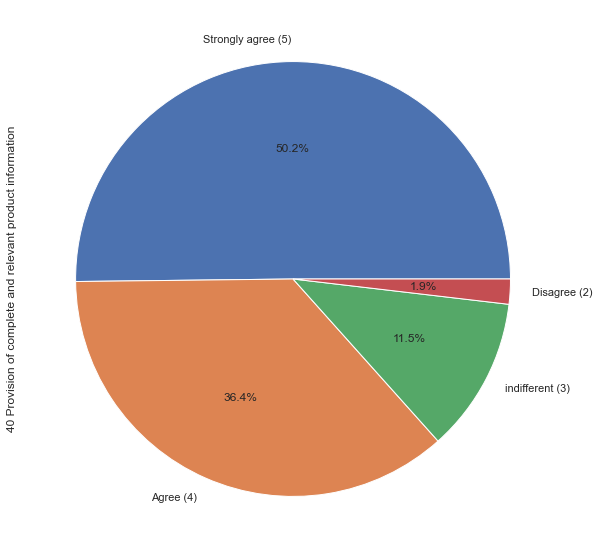

In [92]:
plt.figure(figsize=(10,10))
df['40 Provision of complete and relevant product information'].value_counts().plot.pie(autopct='%1.1f%%')

majority agrees that Provision of complete and relevant product information is important

<AxesSubplot:ylabel='41 Monetary savings'>

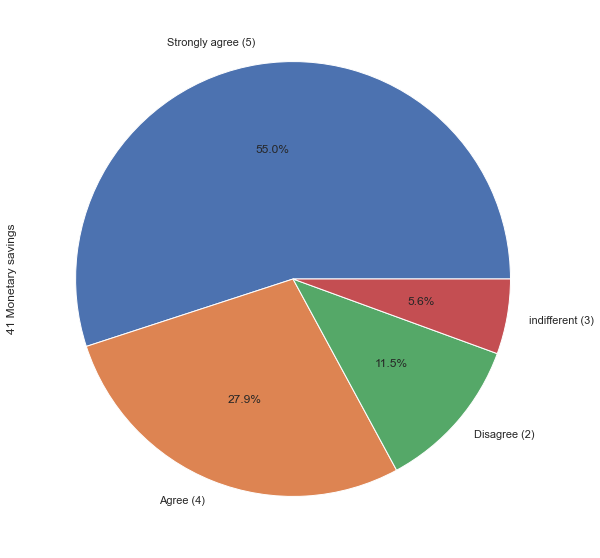

In [93]:
plt.figure(figsize=(10,10))
df['41 Monetary savings'].value_counts().plot.pie(autopct='%1.1f%%')

majority agrees that monetary savings is important

<AxesSubplot:ylabel='42 The Convenience of patronizing the online retailer'>

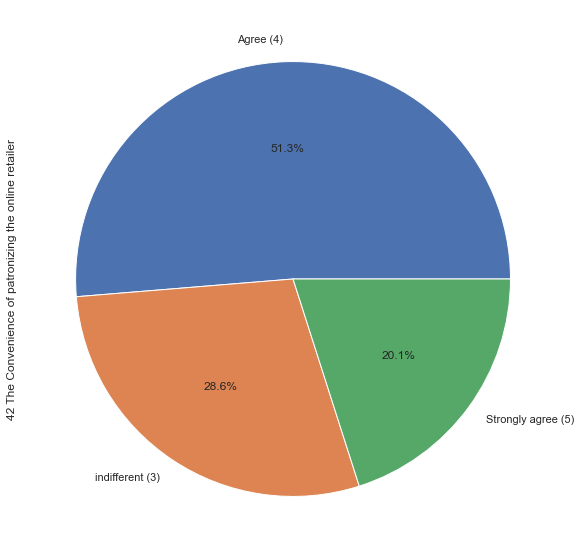

In [94]:
plt.figure(figsize=(10,10))
df['42 The Convenience of patronizing the online retailer'].value_counts().plot.pie(autopct='%1.1f%%')

majority storngly agrees that Convenience of patronizing the online retailer is important

<AxesSubplot:ylabel='43 Shopping on the website gives you the sense of adventure'>

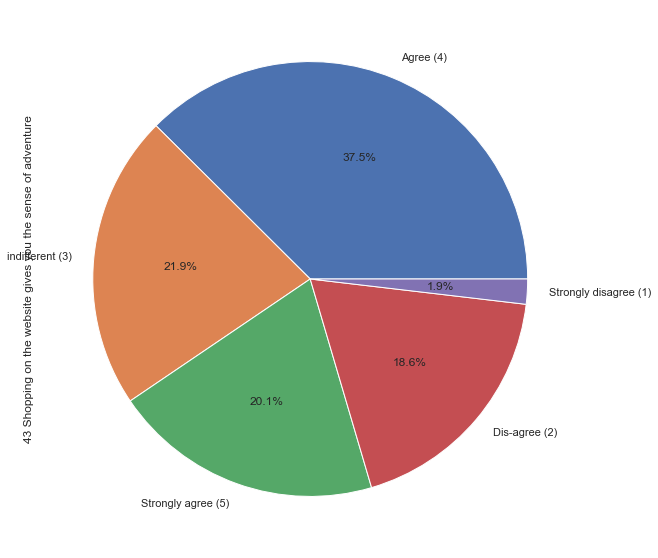

In [95]:
plt.figure(figsize=(10,10))
df['43 Shopping on the website gives you the sense of adventure'].value_counts().plot.pie(autopct='%1.1f%%')

majority storngly agrees that online shopping is adventuruous

<AxesSubplot:ylabel='44 Shopping on your preferred e-tailer enhances your social status'>

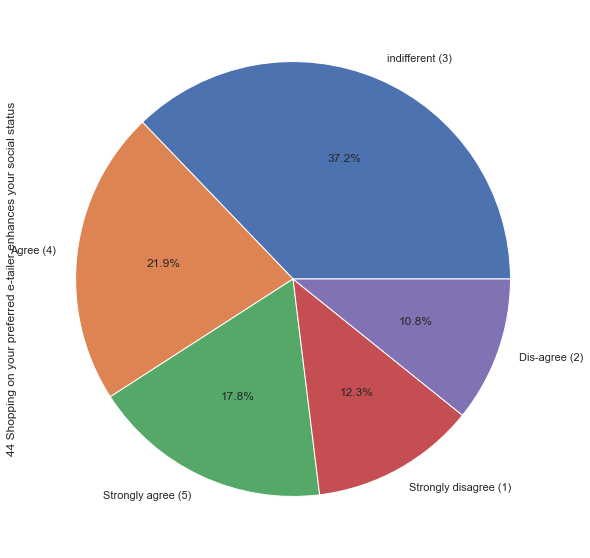

In [96]:
plt.figure(figsize=(10,10))
df['44 Shopping on your preferred e-tailer enhances your social status'].value_counts().plot.pie(autopct='%1.1f%%')

majority storngly agrees that shopping from preferred e retailer improves status

<AxesSubplot:ylabel='45 You feel gratification shopping on your favorite e-tailer'>

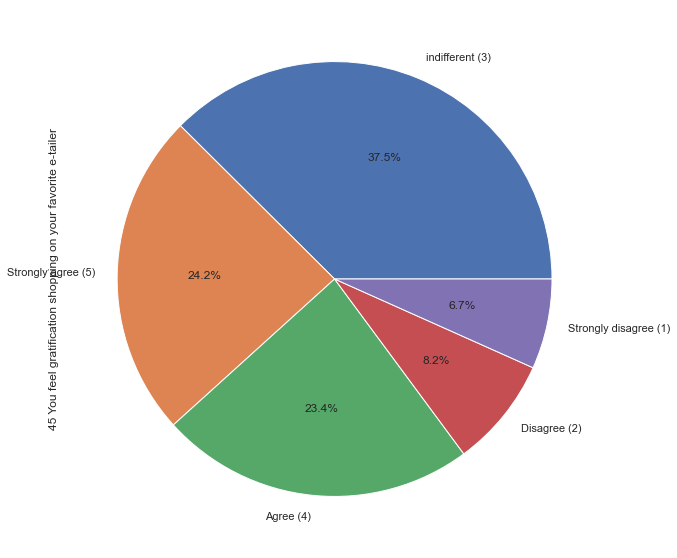

In [97]:
plt.figure(figsize=(10,10))
df['45 You feel gratification shopping on your favorite e-tailer'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='46 Shopping on the website helps you fulfill certain roles'>

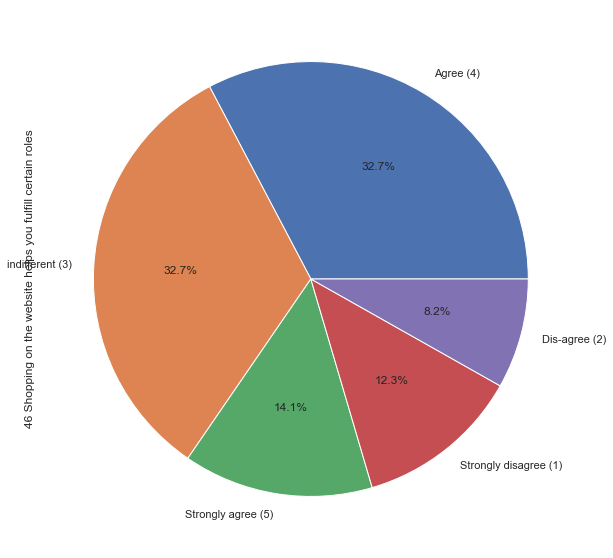

In [98]:
plt.figure(figsize=(10,10))
df['46 Shopping on the website helps you fulfill certain roles'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='47 Getting value for money spent'>

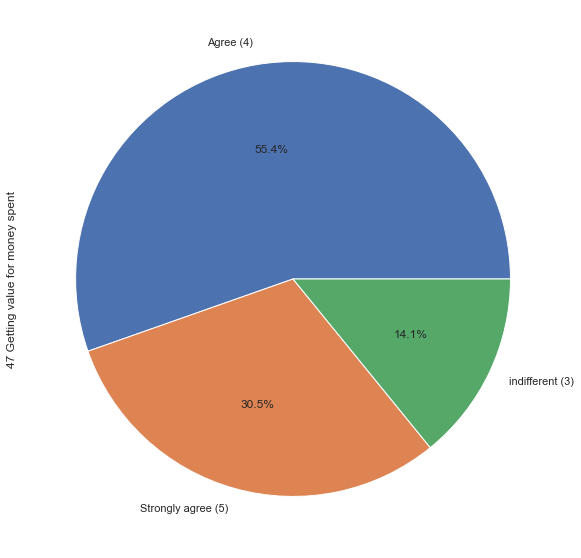

In [99]:
plt.figure(figsize=(10,10))
df['47 Getting value for money spent'].value_counts().plot.pie(autopct='%1.1f%%')

majority storngly agrees that they make value for money purchases from online retailers

<AxesSubplot:ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

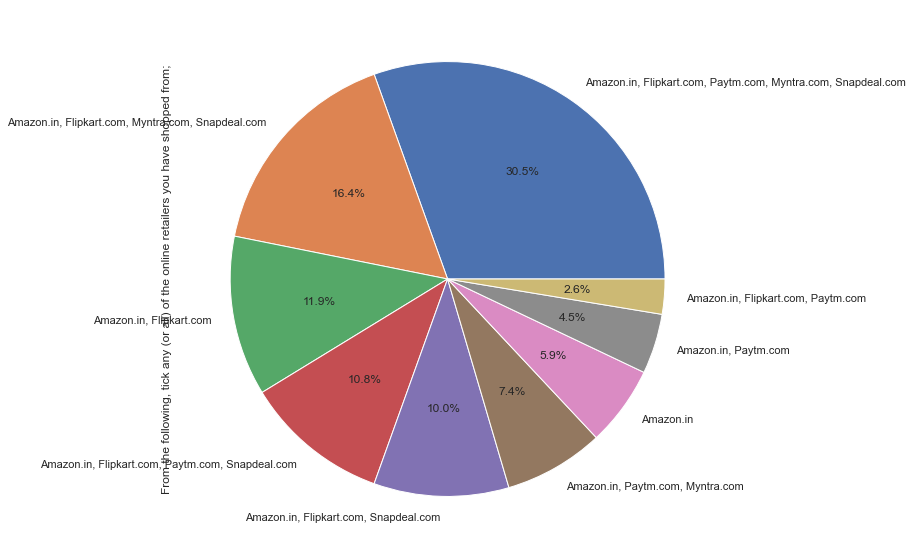

In [101]:
plt.figure(figsize=(10,10))
df['From the following, tick any (or all) of the online retailers you have shopped from;'].value_counts().plot.pie(autopct='%1.1f%%')

majority of people shops from all 5 retail stores and minority only shops from only amazon,flipkart and paytm

<AxesSubplot:ylabel='Easy to use website or application'>

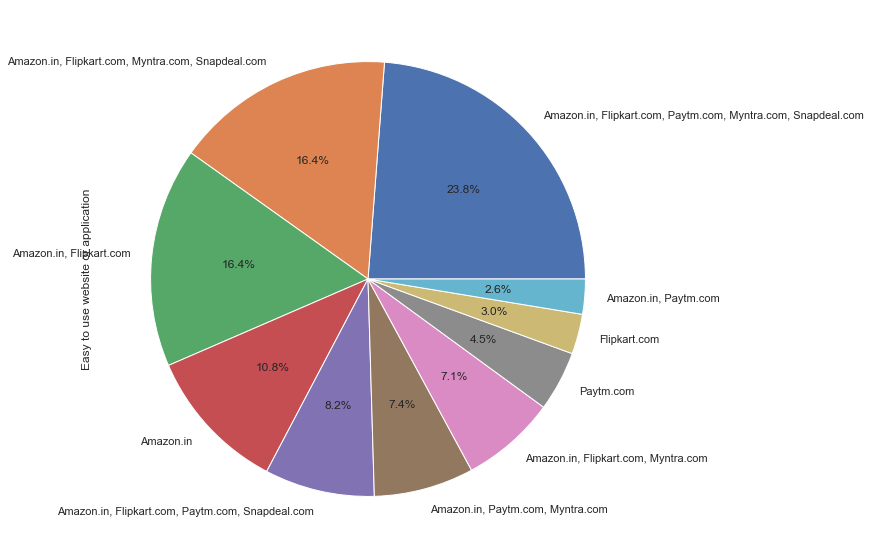

In [106]:
plt.figure(figsize=(10,10))
df['Easy to use website or application'].value_counts().plot.pie(autopct='%1.1f%%')

majority suggests that all the 5 applications are easy to use

<AxesSubplot:ylabel='Visual appealing web-page layout'>

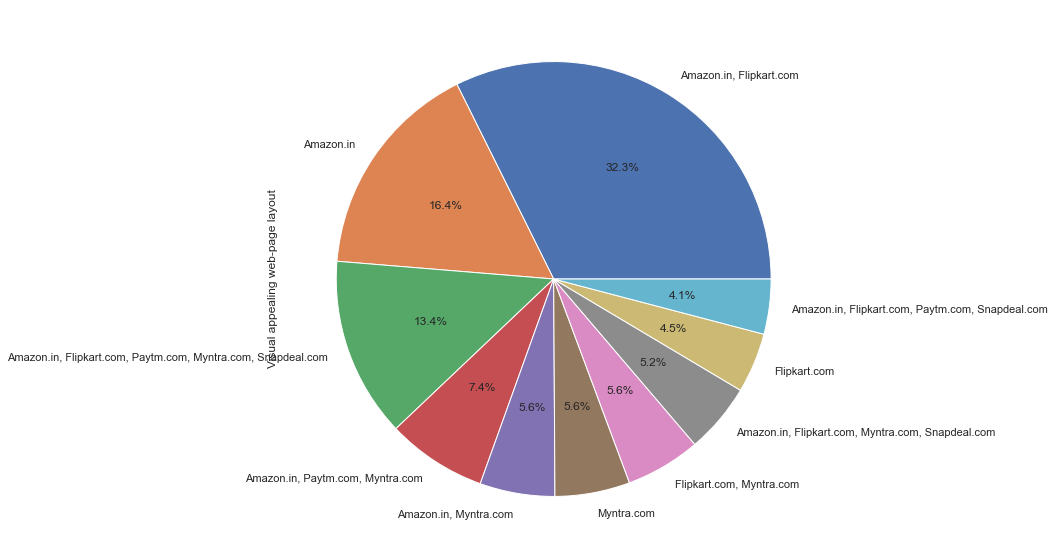

In [108]:
plt.figure(figsize=(10,10))
df['Visual appealing web-page layout'].value_counts().plot.pie(autopct='%1.1f%%')

majority suggests that only flipkart and amazon have only visually appealing web layout,others need to work on it

<AxesSubplot:ylabel='Wild variety of product on offer'>

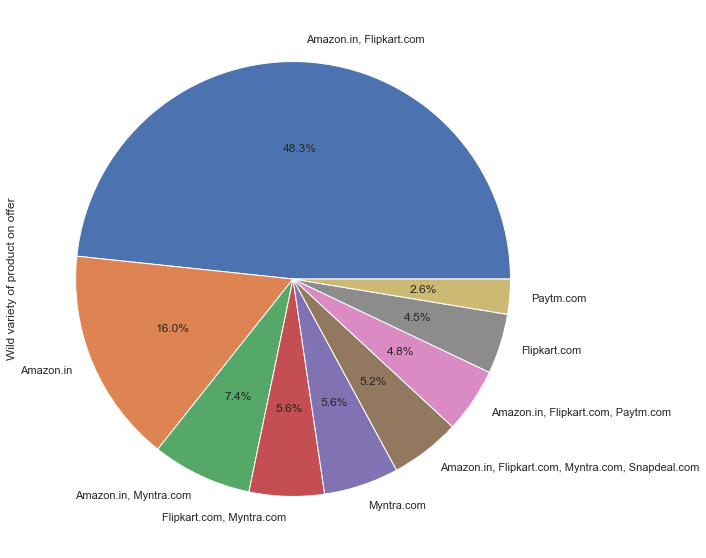

In [109]:
plt.figure(figsize=(10,10))
df['Wild variety of product on offer'].value_counts().plot.pie(autopct='%1.1f%%')

majority suggests that only flipkart and amazon have only wide variety of product on offer

<AxesSubplot:ylabel='Complete, relevant description information of products'>

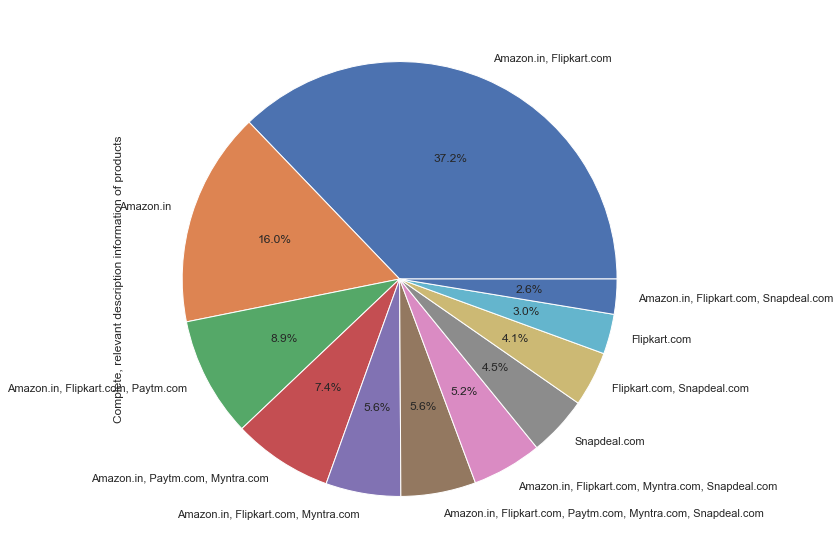

In [110]:
plt.figure(figsize=(10,10))
df['Complete, relevant description information of products'].value_counts().plot.pie(autopct='%1.1f%%')

majority suggests that only amazon and flipkart have relevant product information

<AxesSubplot:ylabel='Fast loading website speed of website and application'>

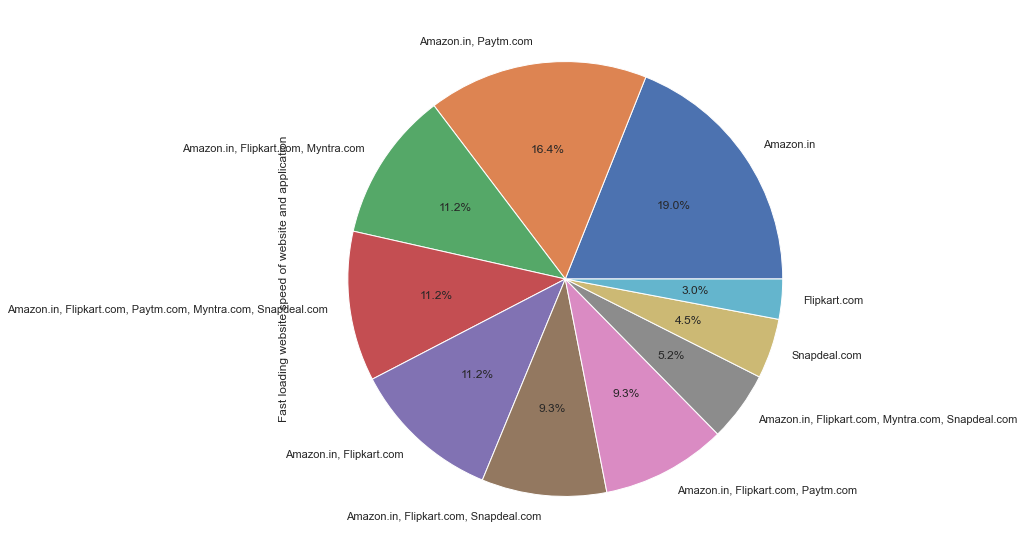

In [111]:
plt.figure(figsize=(10,10))
df['Fast loading website speed of website and application'].value_counts().plot.pie(autopct='%1.1f%%')

19% suggets that only amazon has a fast loading website but more or less every application have fast loading website

<AxesSubplot:ylabel='Reliability of the website or application'>

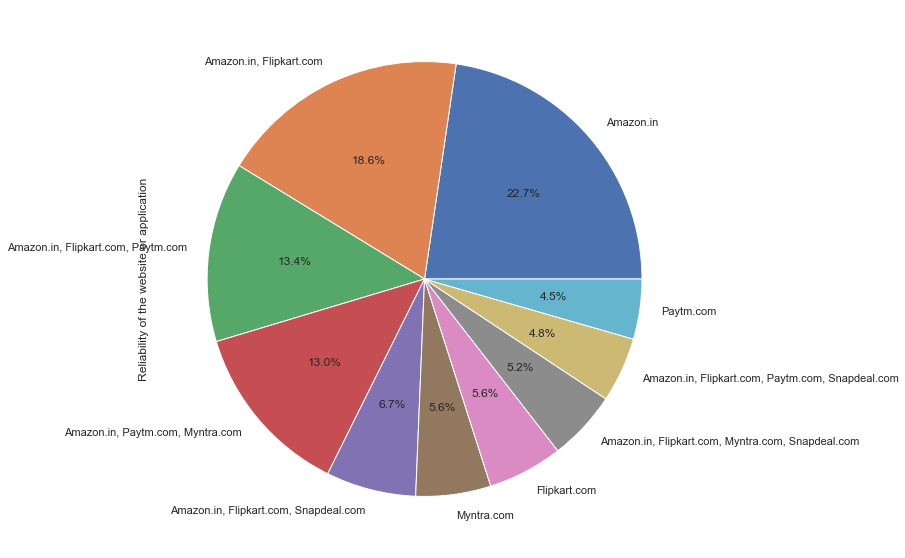

In [112]:
plt.figure(figsize=(10,10))
df['Reliability of the website or application'].value_counts().plot.pie(autopct='%1.1f%%')

amazon is the most reiable website to online shoppers

<AxesSubplot:ylabel='Quickness to complete purchase'>

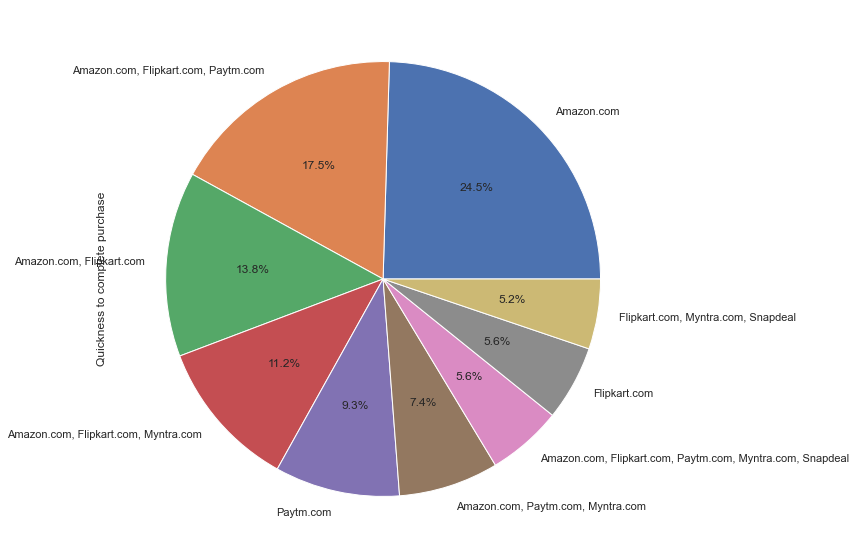

In [113]:
plt.figure(figsize=(10,10))
df['Quickness to complete purchase'].value_counts().plot.pie(autopct='%1.1f%%')

majority suggests that amazon is the website where customers expeirnece quick purchase

<AxesSubplot:ylabel='Availability of several payment options'>

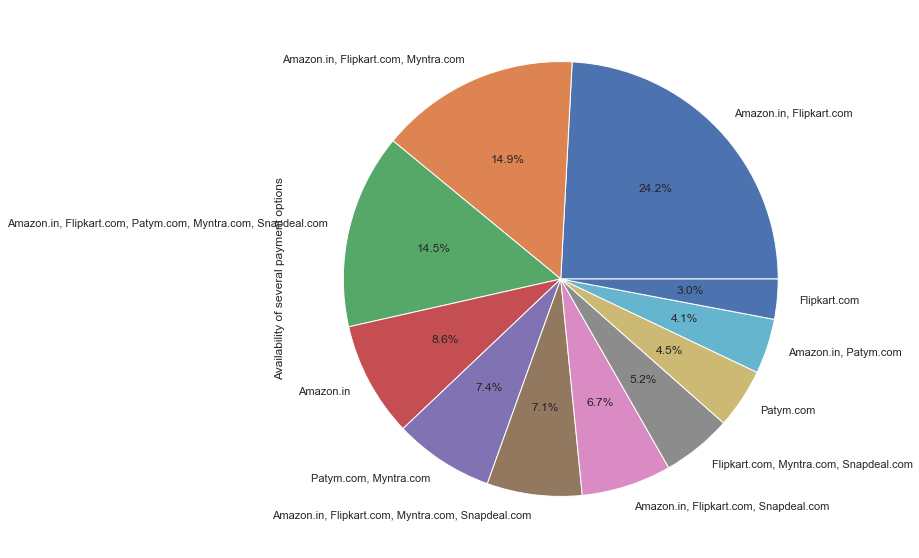

In [114]:
plt.figure(figsize=(10,10))
df['Availability of several payment options'].value_counts().plot.pie(autopct='%1.1f%%')

amazon and flipkart have the mostly avaialable payment options

<AxesSubplot:ylabel='Speedy order delivery'>

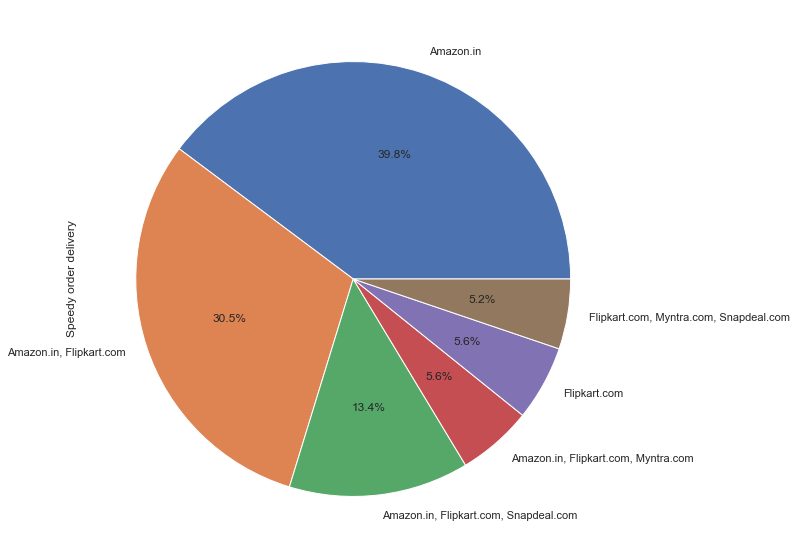

In [115]:
plt.figure(figsize=(10,10))
df['Speedy order delivery'].value_counts().plot.pie(autopct='%1.1f%%')

amazon has the fastest product delivery and flipkart is in the 2nd position

<AxesSubplot:ylabel='Privacy of customers? information'>

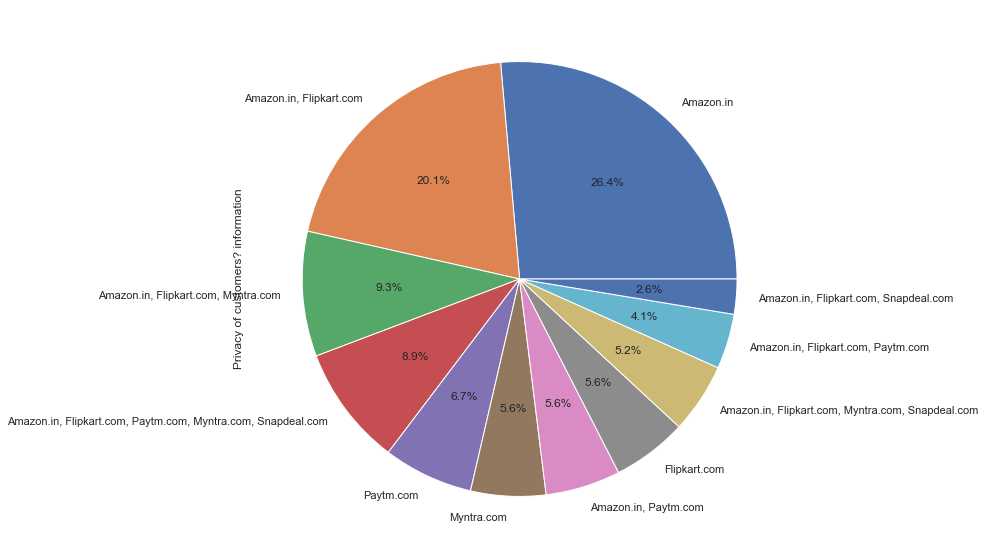

In [116]:
plt.figure(figsize=(10,10))
df['Privacy of customers? information'].value_counts().plot.pie(autopct='%1.1f%%')

amazon and flipkart are the most trusted online applications

<AxesSubplot:ylabel='Security of customer financial information'>

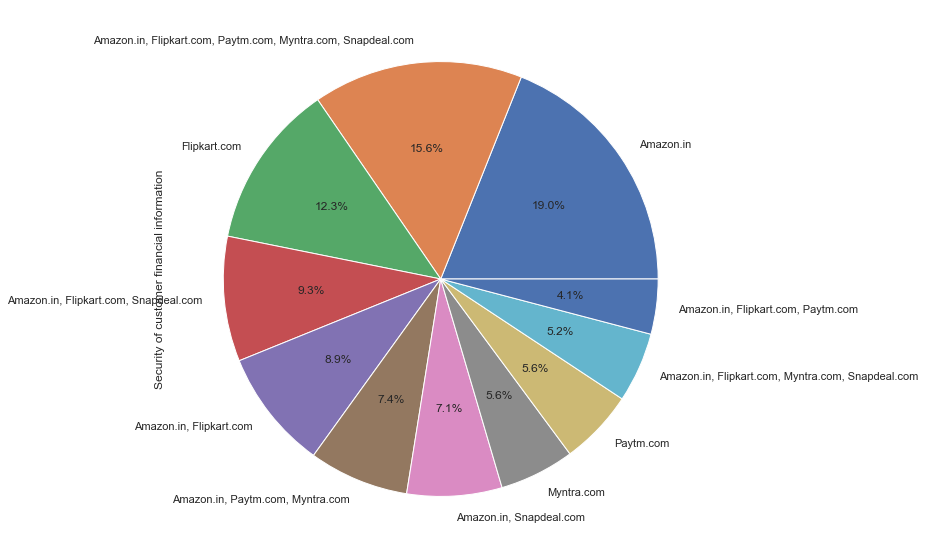

In [117]:
plt.figure(figsize=(10,10))
df['Security of customer financial information'].value_counts().plot.pie(autopct='%1.1f%%')

amazon and flipkart are the most trusted online applications that secures customer's financial information

<AxesSubplot:ylabel='Perceived Trustworthiness'>

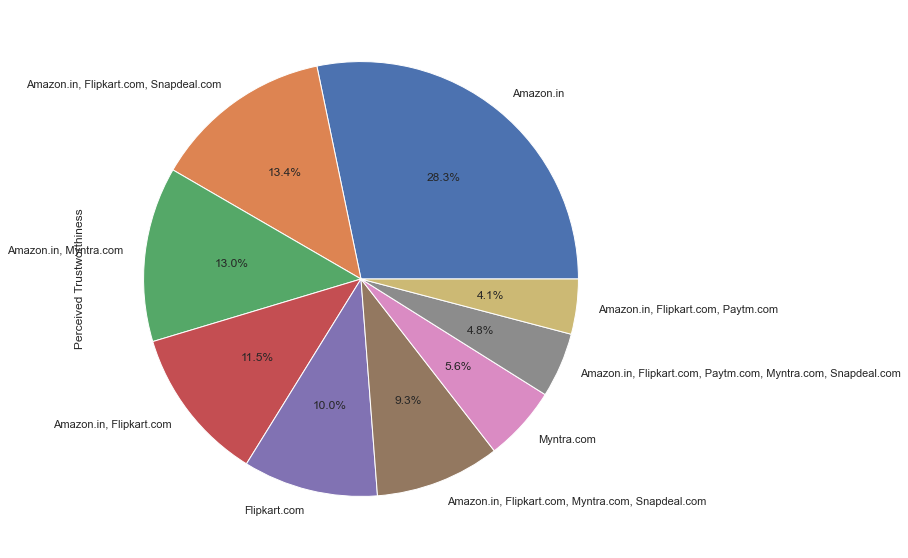

In [118]:
plt.figure(figsize=(10,10))
df['Perceived Trustworthiness'].value_counts().plot.pie(autopct='%1.1f%%')

AMAZON is the most trusted online retail stores which got a vote of 28.3% amongst all

<AxesSubplot:ylabel='Presence of online assistance through multi-channel'>

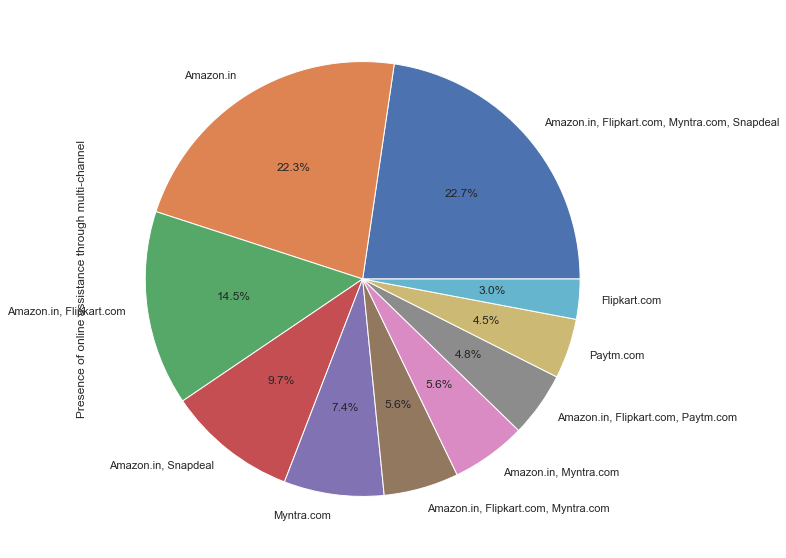

In [119]:
plt.figure(figsize=(10,10))
df['Presence of online assistance through multi-channel'].value_counts().plot.pie(autopct='%1.1f%%')

amazon, flipkart,snapdeal and myntra all have online assistance through multi-channel

<AxesSubplot:ylabel='Longer time to get logged in (promotion, sales period)'>

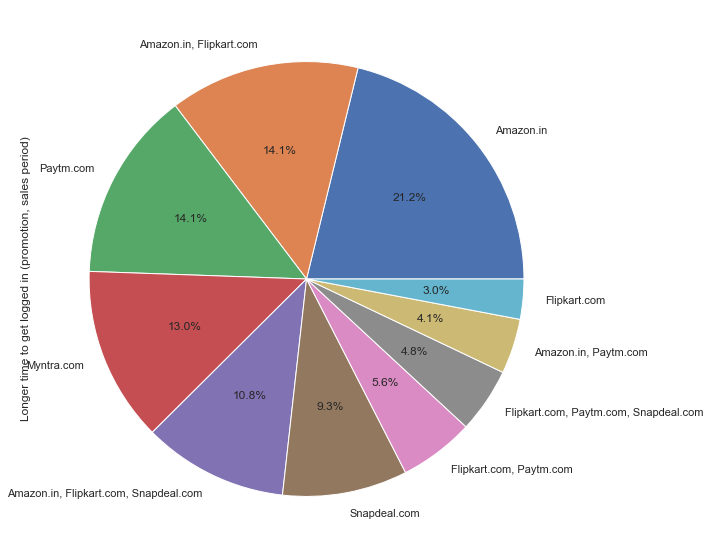

In [120]:
plt.figure(figsize=(10,10))
df['Longer time to get logged in (promotion, sales period)'].value_counts().plot.pie(autopct='%1.1f%%')

amazon takes the longer time to log in during sales period. this means amazon has huge traffic during sales

<AxesSubplot:ylabel='Longer time in displaying graphics and photos (promotion, sales period)'>

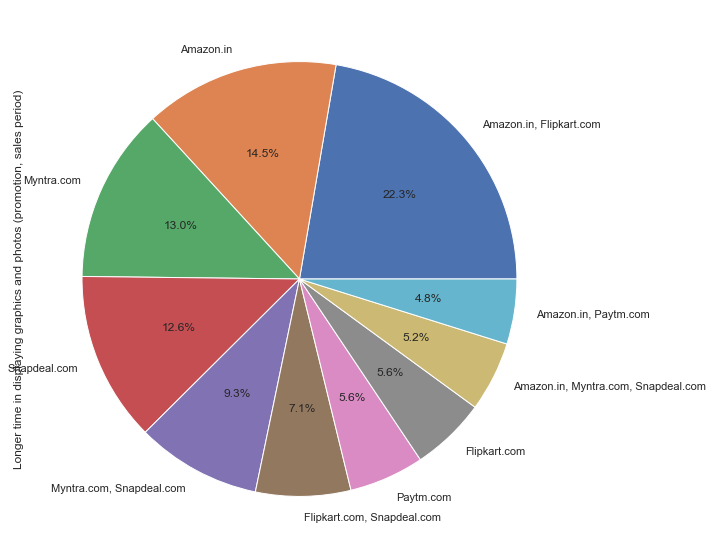

In [121]:
plt.figure(figsize=(10,10))
df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts().plot.pie(autopct='%1.1f%%')

both amazon and flipkart taken longer to display photos during sales period

<AxesSubplot:ylabel='Late declaration of price (promotion, sales period)'>

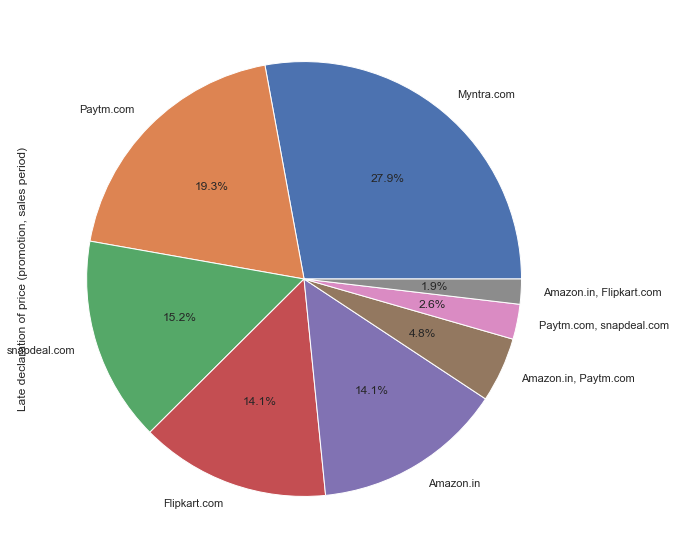

In [122]:
plt.figure(figsize=(10,10))
df['Late declaration of price (promotion, sales period)'].value_counts().plot.pie(autopct='%1.1f%%')

myntra is perceived to take longer for declaration of price

<AxesSubplot:ylabel='Longer page loading time (promotion, sales period)'>

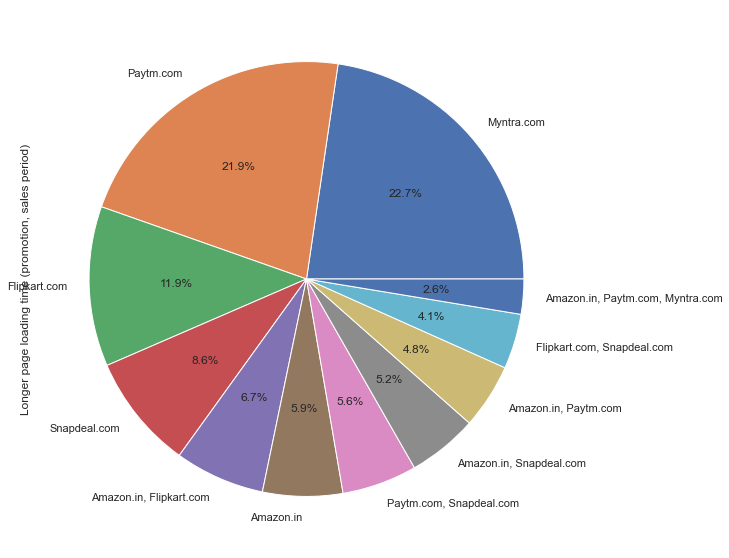

In [123]:
plt.figure(figsize=(10,10))
df['Longer page loading time (promotion, sales period)'].value_counts().plot.pie(autopct='%1.1f%%')

myntra has the longest page loading time during sales

<AxesSubplot:ylabel='Limited mode of payment on most products (promotion, sales period)'>

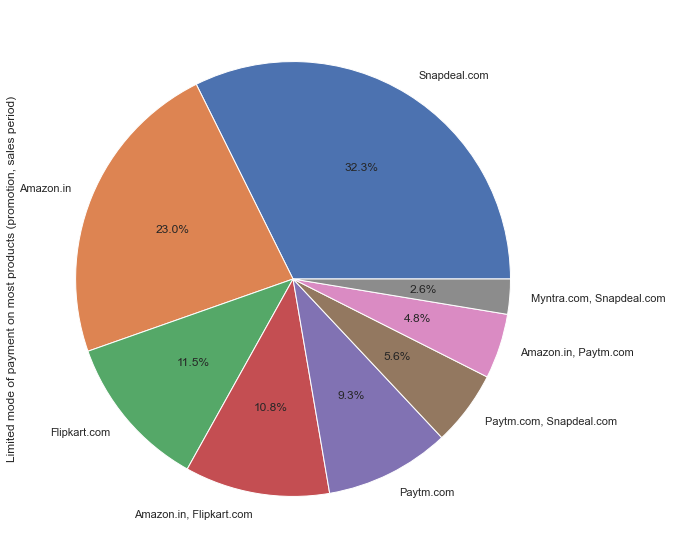

In [124]:
plt.figure(figsize=(10,10))
df['Limited mode of payment on most products (promotion, sales period)'].value_counts().plot.pie(autopct='%1.1f%%')

snapdeal has limited mode of payment, thus customers feel inconvenient

<AxesSubplot:ylabel='Longer delivery period'>

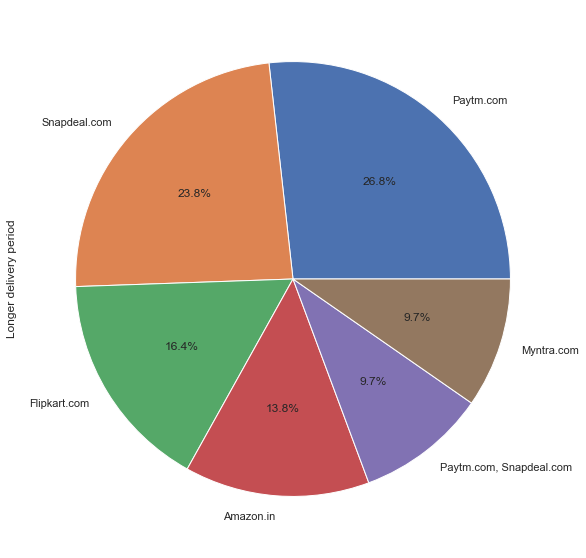

In [125]:
plt.figure(figsize=(10,10))
df['Longer delivery period'].value_counts().plot.pie(autopct='%1.1f%%')

paytm has the longest delivery period and myntra has the fastest

<AxesSubplot:ylabel='Change in website/Application design'>

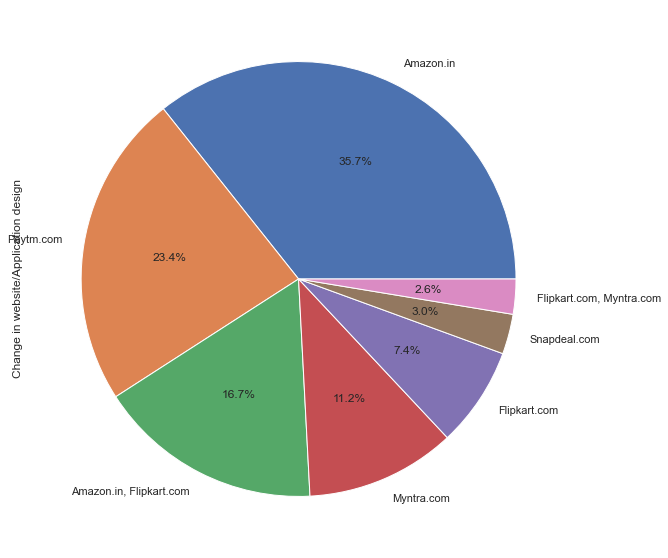

In [126]:
plt.figure(figsize=(10,10))
df['Change in website/Application design'].value_counts().plot.pie(autopct='%1.1f%%')

amazon is the one that frequently changes application and website design. this means they focus on customer convenience

<AxesSubplot:ylabel='Frequent disruption when moving from one page to another'>

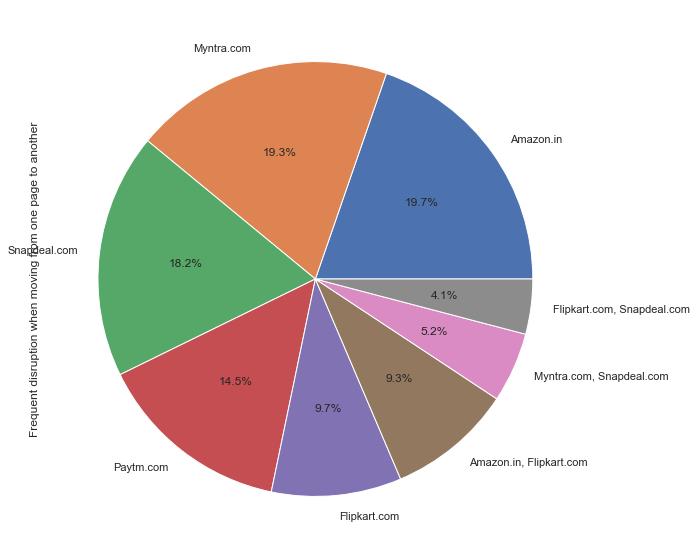

In [128]:
plt.figure(figsize=(10,10))
df['Frequent disruption when moving from one page to another'].value_counts().plot.pie(autopct='%1.1f%%')

amazon and myntra has frequent page disruption 

<AxesSubplot:ylabel='Website is as efficient as before'>

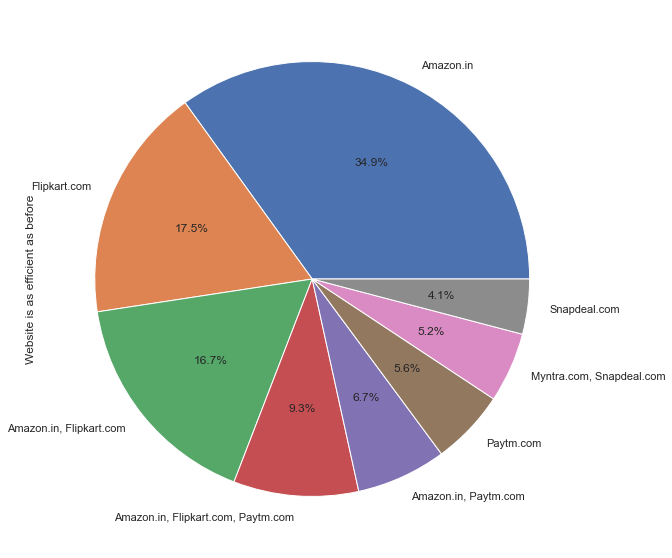

In [129]:
plt.figure(figsize=(10,10))
df['Website is as efficient as before'].value_counts().plot.pie(autopct='%1.1f%%')

amazon has the most efficient website

<AxesSubplot:ylabel='Which of the Indian online retailer would you recommend to a friend?'>

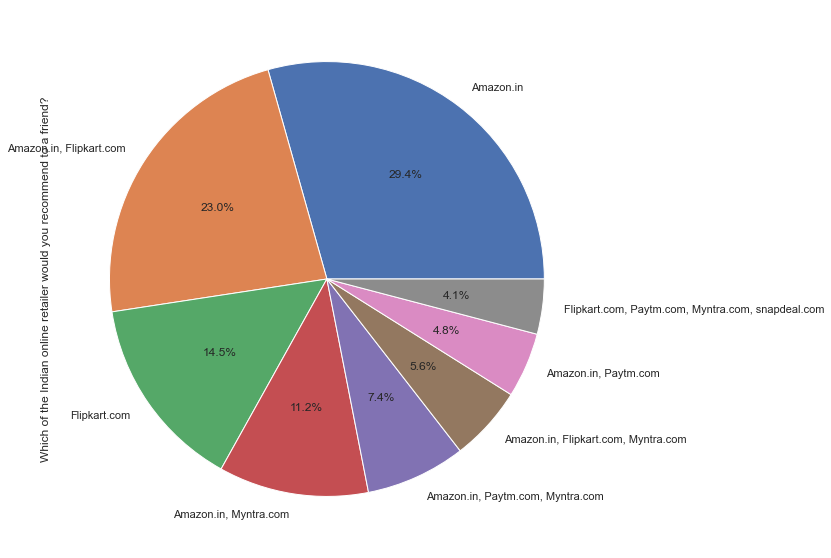

In [130]:
plt.figure(figsize=(10,10))
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts().plot.pie(autopct='%1.1f%%')

majority suggest that they would suggest amazon to their friend, this suggests that amazon has the best customer acqusition and retention tactics